# Customer Segmentation Analysis with Starbucks
One size does not fit all.

Qi-Wen Ng | General Assembly Singapore | DSI-14 | June 2020

## Introduction

The ‘average customer’ is a concept of the past. Hitting the average does not mean hitting the majority, and this one-size-fits-all strategy does not work for businesses anymore.  Today, understanding our customers and personalization is key to establish stronger customer relationships and ultimately, sustain a profitable business. 

Given a diverse set of customer attributes, how can we identify and create experiences for effective acquisition and retention? Enter "customer segmentation", where we break the customer base into groups that share similiarities such as demographics, psychographics, behavioural, geographic, etc.

Businesses need to be able to segment their customers for:
- Marketing: 
    - Create and tailor marketing messages resonating with each segments based on their real or likely behavior, so that businesses can engage with them more effectively. 
    - Better ROI from Marketing

- Sales: 
    - Identify profitable segments to target customers in that segment to boost profits or identify pockets of growth by shifting people into more profitable segments.
    - Retaining existing customers or attracting new customers with the correct profile
    - Identify the most valuable customers and understanding their trends in order to build the relationship further

- Operations:
    - Stock management by understanding the products that are in demand to reduce overstocking / storage costs or improve logistics
    
- Products:
    - Evaluate product offerings or improve specific products. 

## Problem Statement

As one of the most successful loyalty programs, 'Starbucks Rewards' has a staggering 16 million active members and represents a significant portion of the coffee chain’s growth. Starbucks attributes 40% of its total sales to the loyalty program and has seen same store sales rise by 7%. The Rewards Program is available on mobile devices as the 'Starbucks' App, which the company uses to market products, send out offers, collect payments, and earn stars (rewards) for freebies. 

While mass marketing tactics are still able to get results, the assumption that simply all the members will be interested in what is being promoted is time-consuming, inefficient and expensive. 

In this context, the aim of this project is to:
- Identify and perform customer segmentation based on their commonalities towards offers
- Understanding customer behaviour and providing specific business insights:
    - What offers should be sent to each customer ? 
    - Which customers we should focus for retention / our most profitable customers?
    - Which customers to nurture / focus for potential growth?

## Executive Summary

Our data set contains 17,000 anonymised customer demographics, 306,534 simulated data that mimics customer behavior and customer transactions, and 10 promotional offers or advertisement presented to customers on the Starbucks Rewards mobile app.

Data usually does not usually come in a clean and ready-to-analyze format, and this was the case for my project. The real hard part was to transfer the data in its awkward form to a form I want it to. I had to establish a plan to extract and aggregate the data into a segmentable dataset. I used exploratory analysis to see what type of customers existed, and most importantly, their transaction / promotional engagement habits. Among the feature extraction / cleaning efforts, great challenges resulted from customers having repeat exposures to the same offer, identifying valid offer completions and views (in other words, identifying misattributions), and finally aggregating them into view and convertion rates for each offer type to each customer. I have also calculated recency, frequency and monetary (RFM) scores, which is a common method used for analyzing customer value. Ultimately, I created a customer-centric data, where each row represents a unique customer profile whose demographic attributes and spending behaviours are connected to each other. 

Customers without complete profiles are also a customer. We had 12.8% of total customer profile that had missing demographics. Rather than imputing their data or removing them completely, I decided to separate their profile to evaluate. Then, I used K-Means clustering, an unsupervised machine learning model, to break up the customers into different segments based on how they would respond to promotions. To optimize the model, I used two evaluation metrics to search for the optimal number of clusters:
- Silhouette coefficient (Intercluster distance)
- Inertia Scores / Sum of Squared Errors (Intracluster distance)

After running through many iterations using different sets of features, I decided to select only 11 offer-related / behavioural attributes for segmentation (segmentation attributes), and use the remaining demographic (profiling attributes) only to profile the clusters. 

My results showed that Starbucks customers fell into 9 different clusters, based mostly on their response and conversion to offers, frequency (number of transactions) and monetary (total spent). I presented an overall summary of their behaviours, demographics and profile. 

In addition, I performed an analysis on the offer responsiveness of each cluster. This helps improve marketing focus on what offers to send to customers to ensure effectiveness and optimize our customer acquisition costs. Furthermore, the profitability and life stages of the clusters were also presented. This gives insights into the clusters to focus for retention and clusters to focus on maintaning the relationship / keeping them happy while increasing their purchases. Lastly, I have discovered pockets of potential growth in 4 segments, which Starbucks can focus on to shift these customers into more profitable segments. Two other interesting findings include the misallocation of rewards from non-offer influence and the average revenue generated from offers vs non-offers.

Being aware of these findings and placing priority on important customers will enable Starbucks to optimize their business and drive growth.

### Data Dictionary

There are 3 datasets provided:

* promotion.json: offer meta data sent to users over 30-day test period

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| id               | string    | Offer id                                                          |
| offer_type       | string    | Type of offer: BOGO / discount / information                      |
| difficulty       | int       | Minimum required spend to complete an offer                       |
| reward           | int       | Reward given for completing an offer                              |
| duration         | int       | Time for offer to be valid, in days                               |
| channels         | list of strings |  Channels which the offers were sent                        |

* profile.json: customer demographic data 

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| age              | int       | Age of the customer                                               |
| became_member_on | int       | Date when customer created an account on the rewards app          |
| gender           | str       | Gender of the customer: male(M), female(F), other(O)              |
| id               | str       | Customer id                                                       |
| income           | float     | Customer's income                                                 |



* event-log.json - activity log based on customer

| Features         | Data Type | Remarks                                                           |
| -----------------| ----------|------------------------------------------------------------------ |
| event            | str       | Record description: transaction, offer received, offer viewed, offer completed | 
| person           | str       | Customer id                                                       |
| time             | int       | Time in hours since start of test. The data begins at time t=0    |
| value            | dict of strings     | Either offer id or transaction amount, depending on record description |

Based on the 3 datasets, I created a customer centric dataframe that aggregates all demographic information, behavioural information (receives, views, completion, rewards by offers) and transaction information. This serves as our cleaned and final dataset: 

* customer_df.csv

| Features                  | Data Type | Remarks                                                            |
| --------------------------| ----------| ------------------------------------------------------------------ |
| customer_id               | string    | unique customer identifier                                         |
| gender	                | string    | gender of the customer: male(M), female(F), other(O), none (nan)   |
| age                       | float     | age of the customer                                                |
| income                    | float     | income of the customer
| became_member_on          | datetime  | date the customer became a member                                  |
| days_as_member            | int       | number of days the customer became a member since 31 December 2018 
| bogo_received             | float     | number of bogo offers received
| bogo_viewed               | float     | number of bogo offers viewed
| bogo_completed            | float     | number of bogo offers completed
| bogo_rewarded             | float     | number of bogo offers rewarded
| bogo_viewed_rate          | float     | view rates of bogo offers
| bogo_conversion_rate      | float     | conversion rates of bogo offers
| discount_received         | float     | number of discount offers received
| discount_viewed           | float     | number of discount offers viewed 
| discount_completed        | float     | number of discount offers completed
| discount_rewarded         | float     | number of discount offers rewarded
| discount_viewed_rate      | float     | view rates of discount offers
| discount_conversion_rate  | float     | conversion rates of discount offers
| info_received             | float     | number of informational offers received
| info_viewed               | float     | number of informational offers viewed
| info_viewed_rate          | float     | view rates of informational offers
| total_received            | float     | total number of offers received 
| total_viewed              | float     | total number of offers viewed
| total_completed           | float     | total number of offers completed 
| overall_view_rate         | float     | overall view rates
| overall_conversion_rate   | float     | overall ratio of offers completed compared to how many received |
| total_rewarded            | float     | total rewards given to the customer
| num_transactions          | float     | number of monetary transactions done by the customer
| offer_num_transactions    | float     | number of offer-associated monetary transactions done by the customer
| actual_num_transactions   | float     | number of non-offer monetary transactions done by the customer
| total_spent               | float     | total amount spent by the customer across all transactions
| offer_spent               | float     | total offer-associated amount spent by the customer
| actual_spent              | float     | total non-offer amount spent by the customer
| avg_spent                 | float     | average amount spent by the customer across all transactions
| min_spent                 | float     | lowest amount spent of the customer
| max_spent                 | float     | highest amount spent of the customer
| recency                   | float     | how recent the customer spent

### Table of Contents:
#### Part 2: Customer Segmentation
- [1. Preprocessing: Feature Selection & Scaling](#1.-Preprocessing:-Feature-Selection-&-Scaling)<br>
- [2. Clustering](#2.-Clustering)<br>
    - [2.1 All Features](#2.1-All-Features)<br>
    - [2.2 Dimensionality Reduction using PCA](#2.2-Dimensionality-Reduction-using-PCA)<br>
    - [2.3 Dimensionality Reduction: Correlation Filter](#2.3-Dimensionality-Reduction:-Correlation-Filter)<br>
    - [2.4 Selecting Segmentation Attributes only](#2.4-Selecting-Segmentation-Attributes-only)<br>
- [3. Cluster Analysis](#3.-Cluster-Analysis)<br>
    - [3.1 Analysis of Offer Responsiveness: What offer should be sent to our customers?](#3.1-Analysis-of-Offer-Responsiveness:-What-offer-should-be-sent-to-our-customers?)<br>
    - [3.2 Analysis of Profitability: Who are our most profitable customers?](#3.2-Analysis-of-Profitability:-Who-are-our-most-profitable-customers?)<br>
    - [3.3 Analysis of Potential Growth: Which customers to focus for potential growth?](3.3-Analysis-of-Potential-Growth:-Which-customers-to-focus-for-potential-growth?)<br>
- [4. Conclusion & Recommendations](#4.-Conclusion-&-Recommendations)<br>

## Part 2: Customer Segmentation

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime as dt
 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1. Preprocessing: Feature Selection & Scaling

In [2]:
df = pd.read_csv('./datasets/customer_df.csv')
df.head()

,customer_id,gender,age,income,became_member_on,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,NaN,2017-02-12,687,0.0,0.0,0.0,0.0,0.0,0.000,5.0,5.0,2.0,5.0,1.000,0.4,0.0,0.0,0.0,5.0,5.0,2.0,1.0,0.4,5.0,9.0,1.0,8.0,20.40,2.12,18.28,2.27,0.06,5.21,9.667
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,112000.0,2017-07-15,534,1.0,0.0,0.0,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,3.0,77.01,0.00,77.01,25.67,21.51,32.28,7.333
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN,NaN,2018-07-12,172,1.0,1.0,0.0,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.5,0.0,0.0,6.0,0.0,6.0,14.30,0.00,14.30,2.38,1.34,4.09,9.667
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,100000.0,2017-05-09,601,3.0,3.0,2.0,20.0,1.0,0.667,0.0,0.0,0.0,0.0,0.000,0.0,1.0,1.0,1.0,4.0,4.0,2.0,1.0,0.5,20.0,7.0,2.0,5.0,159.27,41.61,117.66,22.75,17.78,29.72,7.417
4,a03223e636434f42ac4c3df47e8bac43,NaN,NaN,NaN,2017-08-04,514,0.0,0.0,0.0,0.0,0.0,0.000,3.0,2.0,0.0,0.0,0.667,0.0,2.0,1.0,0.5,5.0,3.0,0.0,0.6,0.0,0.0,3.0,0.0,3.0,4.65,0.00,4.65,1.55,0.06,3.50,8.500


In [3]:
#fill null in gender with U meaning unknown
df['gender'].fillna('U', inplace = True)

#one hot encode gender
df = pd.get_dummies(df,columns=['gender'])

### 1.1 Split Data into with demographics and without demographics

From our EDA, the rows with nulls (12.8% of total customer profile) are primarily those that did not provide any demographic data at all. If we impute, our segmentation analysis may become bias towards a certain demographic group (i.e. gender, income, age). At the same time, if we drop them, we will be losing valuable information as this group's behavioural attributes may be important. 

We wil explore the behavioural patterns in data with demographics and without demographics.

In [4]:
#split data into one full set and another set with missing age/income/gender
df1 = df.dropna(axis = 0)

#drop gender U since all values will be 0
df1.drop(columns='gender_U', inplace=True)

df1.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,age,income,became_member_on,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency,gender_F,gender_M,gender_O
1,0610b486422d4921ae7d2bf64640c50b,55.0,112000.0,2017-07-15,534,1.0,0.0,0.0,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.000,0.000,5.0,3.0,0.0,3.0,77.01,0.00,77.01,25.67,21.51,32.28,7.333,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.0,2017-05-09,601,3.0,3.0,2.0,20.0,1.0,0.667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,2.0,1.000,0.500,20.0,7.0,2.0,5.0,159.27,41.61,117.66,22.75,17.78,29.72,7.417,1,0,0
5,e2127556f4f64592b11af22de27a7932,68.0,70000.0,2018-04-26,249,1.0,1.0,1.0,5.0,1.0,1.000,2.0,2.0,1.0,2.0,1.0,0.5,1.0,0.0,0.0,4.0,3.0,2.0,0.750,0.667,7.0,3.0,1.0,2.0,57.73,18.42,39.31,19.24,17.88,21.43,7.250,0,1,0
8,389bc3fa690240e798340f5a15918d5c,65.0,53000.0,2018-02-09,325,4.0,4.0,3.0,15.0,1.0,0.750,2.0,2.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,6.0,6.0,5.0,1.000,0.833,19.0,3.0,3.0,0.0,36.43,36.43,0.00,12.14,9.54,15.63,8.333,0,1,0
12,2eeac8d8feae4a8cad5a6af0499a211d,58.0,51000.0,2017-11-11,415,0.0,0.0,0.0,0.0,0.0,0.000,2.0,2.0,1.0,2.0,1.0,0.5,1.0,0.0,0.0,3.0,2.0,1.0,0.667,0.500,2.0,4.0,1.0,3.0,15.62,7.14,8.48,3.90,0.87,7.14,7.917,0,1,0


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.00,55.000,66.000,101.000
income,14825.0,65404.991568,21598.299410,30000.0,49000.00,64000.000,80000.000,120000.000
days_as_member,14825.0,680.478988,419.205158,158.0,366.00,516.000,955.000,1981.000
bogo_received,14825.0,1.790017,1.116262,0.0,1.00,2.000,2.000,6.000
bogo_viewed,14825.0,1.478853,1.055260,0.0,1.00,1.000,2.000,6.000
bogo_completed,14825.0,0.741720,0.915554,0.0,0.00,0.000,1.000,5.000
bogo_rewarded,14825.0,7.234739,7.999693,0.0,0.00,5.000,10.000,50.000
bogo_viewed_rate,14825.0,0.730944,0.387850,0.0,0.50,1.000,1.000,1.000
bogo_conversion_rate,14825.0,0.400172,0.443079,0.0,0.00,0.000,1.000,1.000
discount_received,14825.0,1.798583,1.129934,0.0,1.00,2.000,3.000,6.000


In [6]:
#data with missing age/income/gender
df2 = df[df['age'].isnull()]
df2 = df2.drop(['gender_F', 'gender_M','gender_O','gender_U','income','age'], axis=1)
df2.head()

,customer_id,became_member_on,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,687,0.0,0.0,0.0,0.0,0.000,0.0,5.0,5.0,2.0,5.0,1.000,0.4,0.0,0.0,0.0,5.0,5.0,2.0,1.0,0.4,5.0,9.0,1.0,8.0,20.40,2.12,18.28,2.27,0.06,5.21,9.667
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,172,1.0,1.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.5,0.0,0.0,6.0,0.0,6.0,14.30,0.00,14.30,2.38,1.34,4.09,9.667
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,514,0.0,0.0,0.0,0.0,0.000,0.0,3.0,2.0,0.0,0.0,0.667,0.0,2.0,1.0,0.5,5.0,3.0,0.0,0.6,0.0,0.0,3.0,0.0,3.0,4.65,0.00,4.65,1.55,0.06,3.50,8.500
6,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,462,1.0,1.0,0.0,0.0,1.000,0.0,3.0,3.0,0.0,0.0,1.000,0.0,1.0,1.0,1.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000
7,68617ca6246f4fbc85e91a2a49552598,2017-10-02,455,3.0,2.0,0.0,0.0,0.667,0.0,2.0,2.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.8,0.0,0.0,2.0,0.0,2.0,0.24,0.00,0.24,0.12,0.05,0.19,9.083


In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
days_as_member,2175.0,641.171034,350.201317,158.0,370.000,518.000,909.500,1977.000
bogo_received,2175.0,1.821609,1.148733,0.0,1.000,2.000,3.000,6.000
bogo_viewed,2175.0,1.556782,1.100041,0.0,1.000,1.000,2.000,6.000
bogo_completed,2175.0,0.140690,0.400637,0.0,0.000,0.000,0.000,3.000
bogo_rewarded,2175.0,1.062069,2.775453,0.0,0.000,0.000,0.000,25.000
bogo_viewed_rate,2175.0,0.752197,0.381170,0.0,0.500,1.000,1.000,1.000
bogo_conversion_rate,2175.0,0.078851,0.232009,0.0,0.000,0.000,0.000,1.000
discount_received,2175.0,1.783448,1.140338,0.0,1.000,2.000,3.000,6.000
discount_viewed,2175.0,1.369655,1.073816,0.0,1.000,1.000,2.000,6.000
discount_completed,2175.0,0.306207,0.592061,0.0,0.000,0.000,0.000,4.000


#### 1.1.1 Comparing Distributions between groups with and without demographic

In [47]:
def compare_distributions(dataframe_1, dataframe_2, col):
    '''This function creates  subplots of scatterplots by passing in a dataframe and list of columns to plot against sale price.'''
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3), sharex = True) 
    ax = ax.ravel()

    #plot dataframe_1
    sns.distplot(dataframe_1[col], kde = False, ax=ax[0], color='b')
    ax[0].set_title(f'With demographics: Distribution of {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')
    
    #plot dataframe_2 
    sns.distplot(dataframe_2[col], kde = False, ax=ax[1], color = 'r')
    ax[1].set_title(f'Without demographics: Distribution of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')
    
    plt.tight_layout();

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


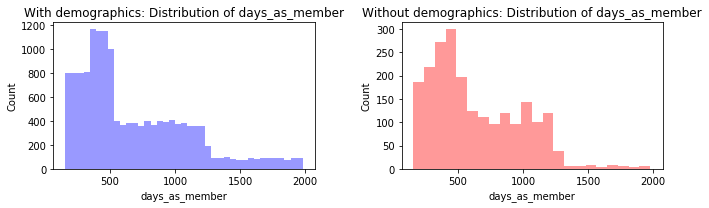

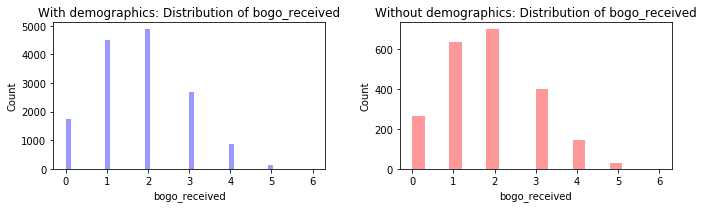

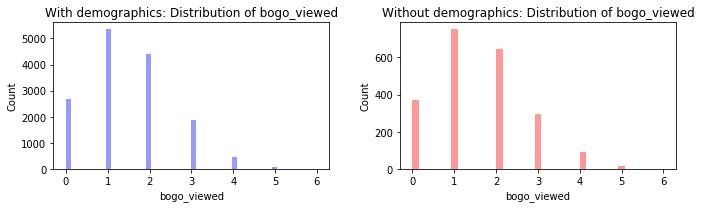

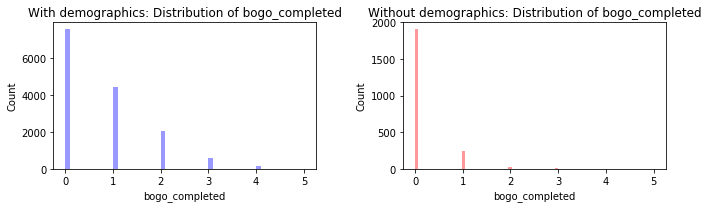

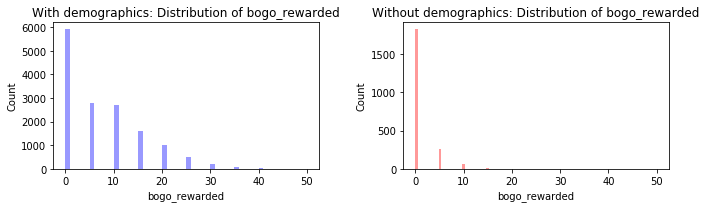

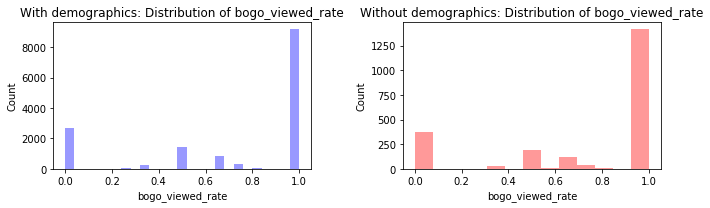

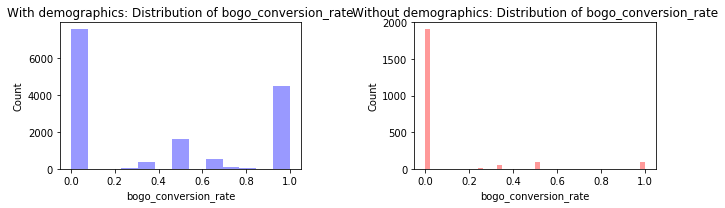

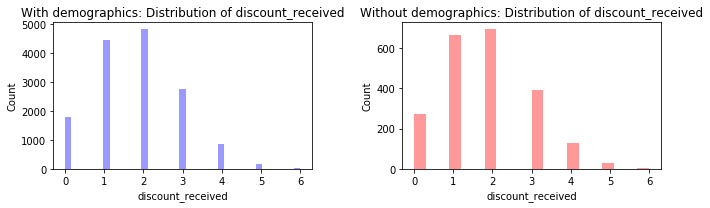

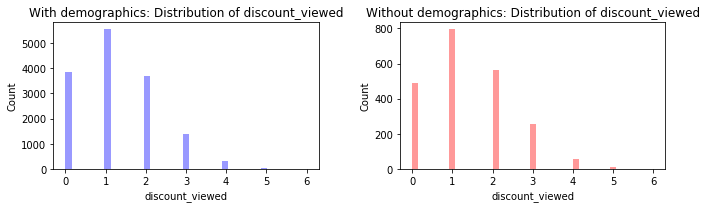

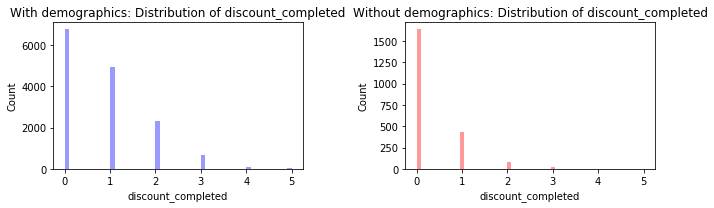

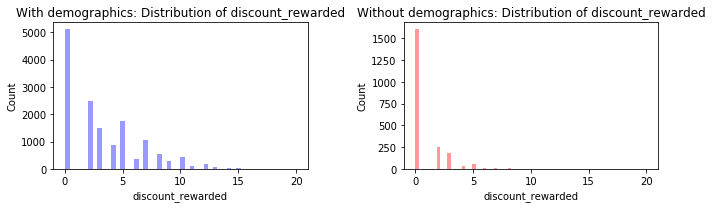

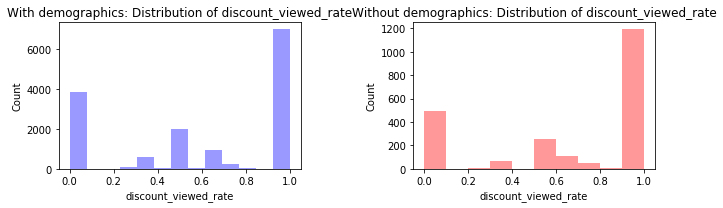

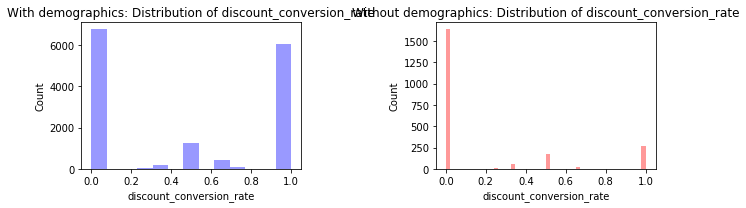

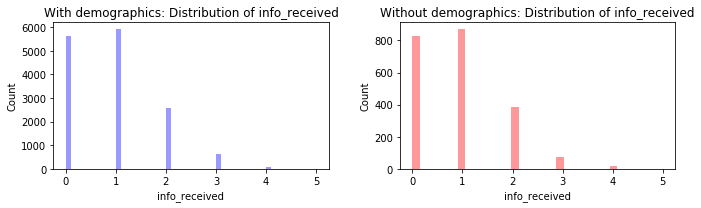

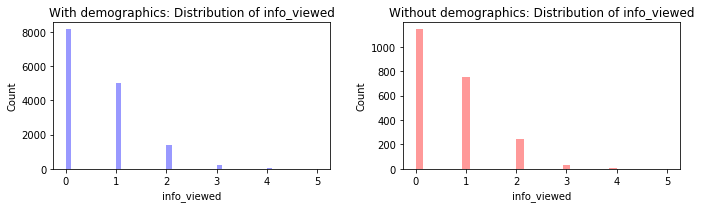

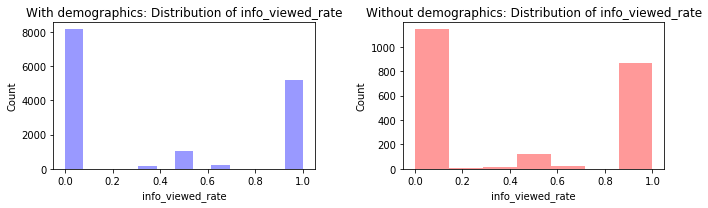

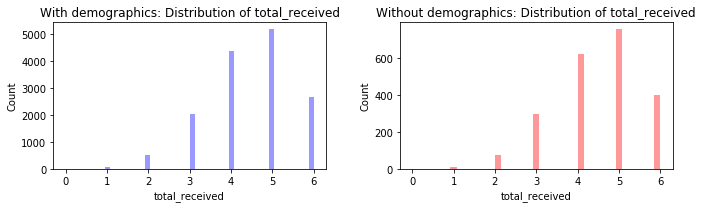

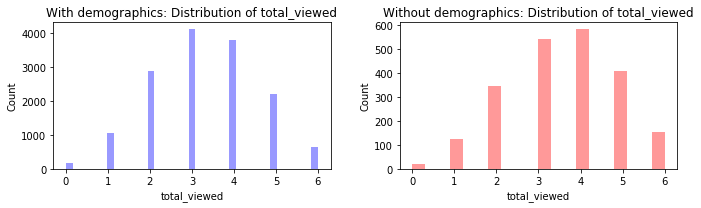

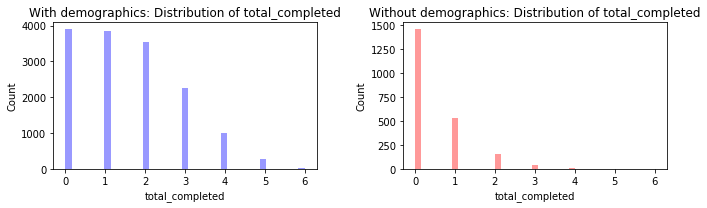

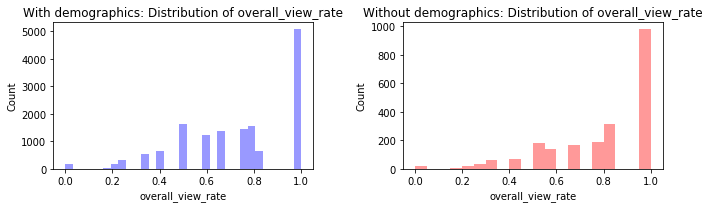

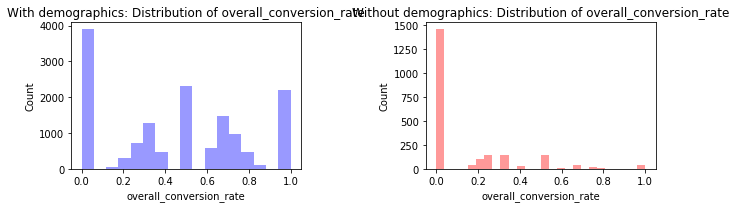

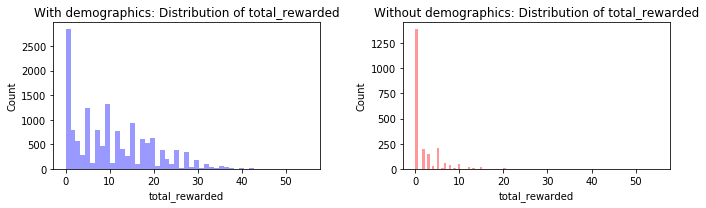

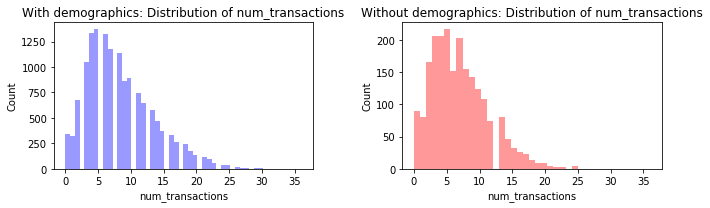

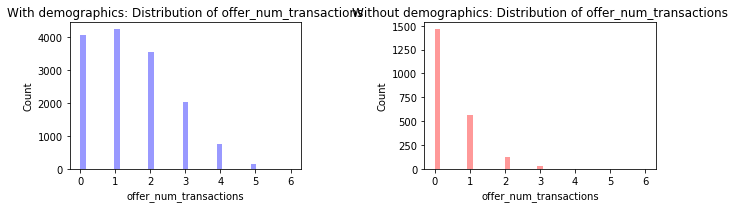

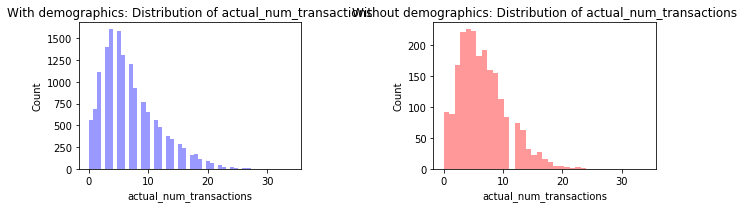

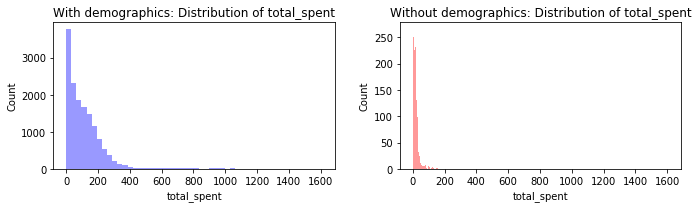

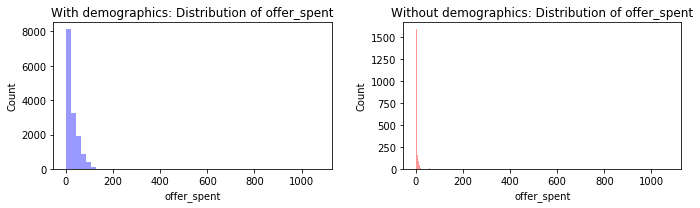

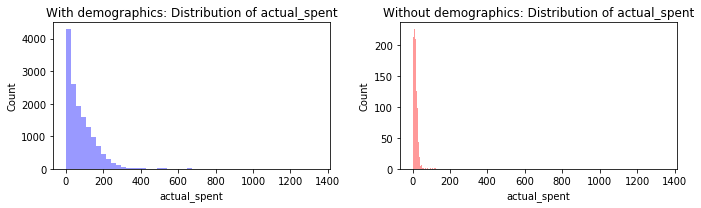

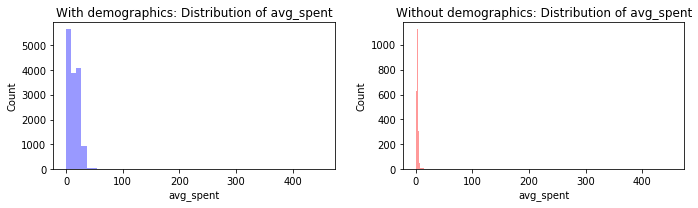

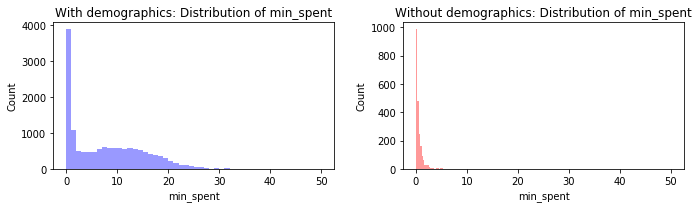

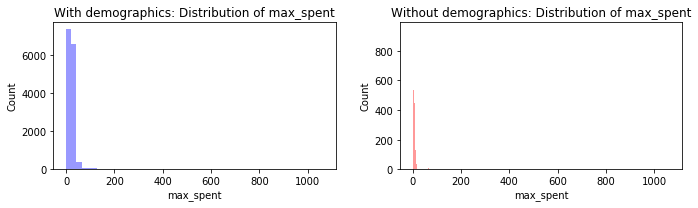

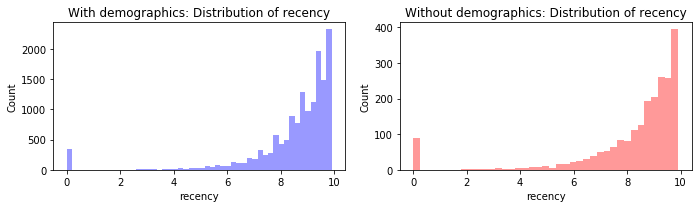

In [49]:
columns = list(df1.columns.drop(['gender_F','gender_M','gender_O', 'gender_U','age','customer_id','became_member_on','income']))

for col in columns:
    compare_distributions(df1, df2, col)

**Observations**:

- Rather than imputing or removing these rows completely, we will take out the missing columns and split into two datasets, then evaluate their spending patterns.

## 2. Clustering

Here we will run clustering on these:
- All 37 features on data with demographic data / 29 features on data without demographic data
- All 37 features with PCA on data with demographic data
- Selected 19 features on data with demographic data / 14 features on data without demographic data
- Selected 11 behavioural features on full dataset

**Steps:**
1. Feature Selection
2. Feature Scaling
   - K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So we use StandardScaler to bring them to the same magnitude.
    
    
3. Hyperparameter tuning: searching for optimal number of clusters (function: `search_cluster_num`)

    - We are going to build different K-means models with k values 2 to 30 and evaluate them using the metrics below:
        - **Silhouette scores**: Intercluster distance. The silhouette ranges from −1 to +1 and show how close or far away the clusters are from each other and how dense the clusters are. A **higher** value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

        - **Inertia score / sum of squared errors (SSE)**: Intracluster distance. Smaller the inertia the denser the cluster (closer together all the points are). We will use the “Elbow Method” for significant drop in SSE before it starts to flatten / stabilize. it measures the error within a cluster, or the distance between each datapoint and the centroid of its assigned cluster. A lower distortion score means a tighter cluster, which means the customers in that cluster would have a lot in common.


4. K-Means Clustering (function: `kmeans_cluster`)

    Here, we will fit K-Means model with our selected number of clusters to obtain cluster predictions for the data.

    Let’s first understand how the algorithm will form customer groups:
    1. Initialize n_clusters = our selected k value (or number of clusters) using the k-means++ algorithm
    2. Assign each data point to the closest centroid based on euclidian distance, thus forming the groups
    3. Move centers to the average of all points in the cluster
    4. Repeat steps 2 and 3 until convergence.


Note: 
- init = K-means ++
    - The performance of the original k-means depends heavily on the initialization of centroids. Sometimes, the initial centroids are placed in a such a way that during consecutive iterations of K-means the clusters the clusters keep on changing drastically and even before the convergence condition may occur, max_iter is reached and we are left with incorrect cluster. Poor initialization of centroids will produce bad clustering. K-means++ is designed to improve the centroid initialization for k-means. The basic idea is that the initial centroid should be far away from each other. The algorithm starts by randomly choosing a centroid 𝑐0 from all data points. For centroid 𝑐𝑖, the probability of a data point 𝑥 been chosen as a centroid is proportional to the squares of the distance of 𝑥 to its nearest centroid. In this way, k-means++ always tries to select centroids that are far away from the existing centroids, which leads to significant improvement over k-means with a bit sacrifice on the run time.

- n_init 
    - Number of time the k-means algorithm will be run with different centroid seeds. For each different set of points, a comparision is made about how much distance did the clusters move, i.e. if the clusters travelled small distances than it is highly likely that we are closest to ground truth/best solution. The final results will be the best output of n_init consecutive runs in terms of inertia / the points which provide the best performance and their respective run along with all the cluster labels are returned.

- max_iter
    - Maximum number of iterations of the k-means algorithm for a single run. To assist with convergence.


5. Plot a TSNE graph to visualize the segments / clusters. 
    - t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.


In [11]:
def search_cluster_num(X, min_clusters, max_clusters):
    '''This function takes in the dataframe, min and max number of clusters to run KMeans, and returns the 
    Inertia and Silhoutte Plot for evaluation'''
    
    #empty list to store scores
    scores = []

    #get cluster range based on input
    clusters_range = range(min_clusters,max_clusters)
    
    #looping through each k
    for k in clusters_range:

        #instantiate
        km = KMeans(n_clusters = k, init = 'k-means++', n_init = 20, max_iter = 500, random_state = 42)
        
        #fitting
        km.fit(X)
        
        #get intertia and silhoutte
        iner = km.inertia_       
        sil = silhouette_score(X, km.labels_)
        
        #append to score list
        scores.append([k,iner,sil])
             
    #put scores into dataframe
    scores_df = pd.DataFrame(scores)
    scores_df.columns = ['k','inertia','silhouette score']

    #create subplots for plotting
    fig, ax = plt.subplots(1,2,figsize=(20,8))
    
    #plot k vs inertia
    ax[0].plot(scores_df['k'], scores_df['inertia'], c = 'b', marker='o')
    ax[0].set_title('Inertia (SSE) over k')
    ax[0].set_ylabel("Inertia (SSE)")
    ax[0].set_xlabel("number of clusters")
    
    #plot k vs silhoutte
    ax[1].plot(scores_df['k'], scores_df['silhouette score'], c = 'r', marker='o')
    ax[1].set_title('Silhouette Score over k')
    ax[1].set_ylabel("Silhouette Score")
    ax[1].set_xlabel('number of clusters')
    
    plt.show()

In [12]:
def kmeans_cluster(data, data_sc, n_cluster):
    '''This function takes in the original dataframe, scaled / transformed dataframe, and the number of clusters.
    It performs k-means on the scaled/transformed dataframe according to the number of clusters,
    and returns a cluster analysis based on the original dataframe, along with a flattened graph of the clusters.'''
    
    #Instantiate
    km = KMeans(n_clusters=n_cluster, init = 'k-means++', n_init = 20, max_iter=500, random_state = 42)

    #fit
    km.fit(data_sc)

    #assign labels of cluster
    #df['cluster'] = km.labels_

    #get predictions
    pred_df = km.predict(data_sc)
    
    #assign to data
    data['cluster'] = pred_df       
    cluster_analysis = data.groupby('cluster').mean()

    #get cluster labels
    cluster_labels = km.labels_

    #get cluster centroids
    cluster_centroids = km.cluster_centers_
    
    # using TSNE to visualize the data
    # Initialise TSNE
    tsne = TSNE(random_state=42)
    
    #fit
    transformed = tsne.fit_transform(data_sc)
    
    # Plot t-SNE
    plt.figure(figsize=(10,10))
    plt.title(f'Flattened Graph of {n_cluster} Clusters')
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], 
                    hue=cluster_labels, palette="muted")
    
    return cluster_analysis

### 2.1 All Features

#### 2.1.1 Feature Selection

Before scaling our final data, we will remove some features from df_final:

- customer_id: unique value proprietory to the row
- became_member_on: date column, unable to be scaled

In [50]:
#defining our features for df1
X1 = df1.drop(columns = ['customer_id','became_member_on'])

In [111]:
#defining our features for df2 
X2 = df2.drop(columns = ['customer_id','became_member_on'])

#### 2.1.2 Feature Scaling

In [52]:
#instantitate
ss1 = StandardScaler()

#fit transform
X1_sc = ss1.fit_transform(X1) 

In [53]:
#instantitate
ss2 = StandardScaler()

#fit transform
X2_sc = ss2.fit_transform(X2) 

#### 2.1.3 Hyperparameter Tuning: Searching for optimal number of clusters

##### 2.1.3.1 With Demographics Data: DF1

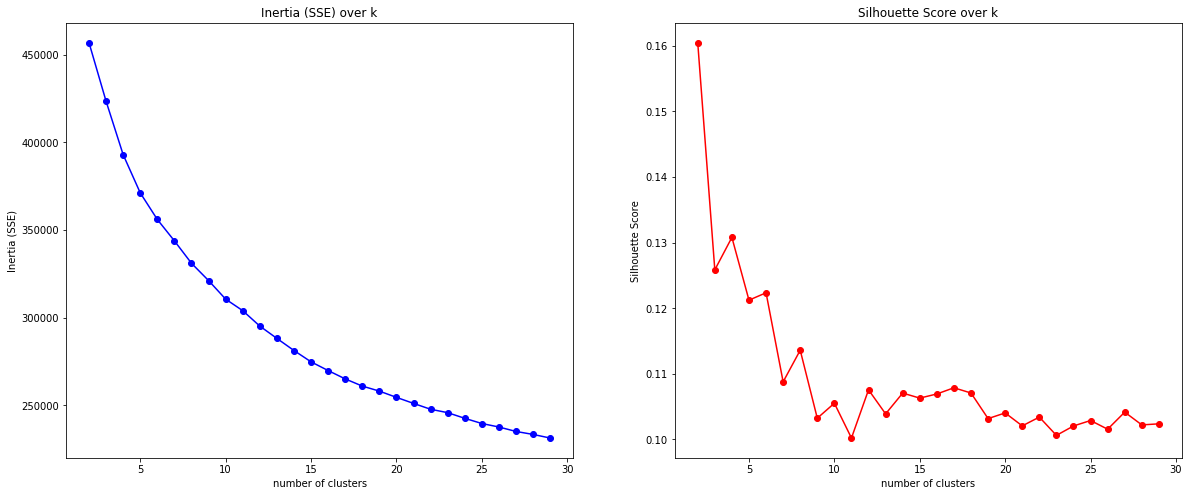

In [54]:
search_cluster_num(X1_sc, 2, 30)

**Observations**: 
- Inertia / SSE: No obvious elbow, but significant drop between cluster 2 to 4.
- Silhouette: k = 4 is optimum cluster as the score is still relatively higher and before sudden decrease

##### 2.1.3.2 Without Demographic Data: DF2

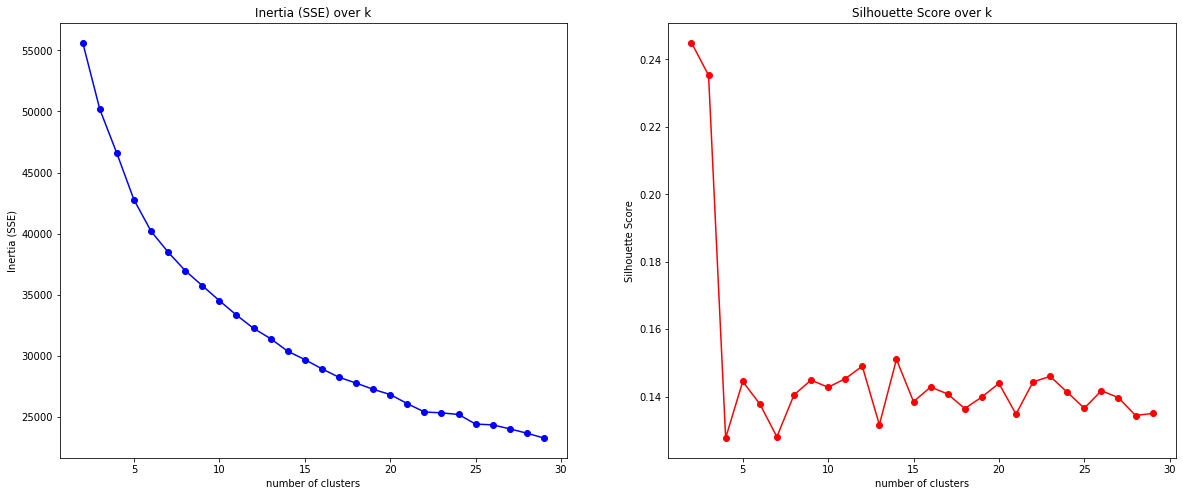

In [55]:
search_cluster_num(X2_sc, 2, 30)

**Observations:**
- Inertia / SSE: No obvious elbow
- Silhouette: k = 3 is optimum cluster as the score is high before a steep drop.


#### 2.1.4 K Means Clustering

##### 2.1.4.1 With Demographics Data: DF1 - Using n_cluster = 4

cluster,0,1,2,3
age,56.951852,54.855492,56.917358,52.206341
income,76922.222222,66621.499902,71781.224926,59596.076371
days_as_member,721.740741,788.981398,753.753410,533.476791
bogo_received,1.855556,1.084786,2.799947,1.756350
bogo_viewed,1.581481,0.847073,2.552287,1.336136
bogo_completed,1.207407,0.405718,1.947847,0.230338
bogo_rewarded,11.981481,4.436068,17.292057,2.926957
bogo_viewed_rate,0.779578,0.628128,0.924957,0.693553
bogo_conversion_rate,0.641681,0.365968,0.787779,0.165491
discount_received,1.922222,2.450558,1.396363,1.472937


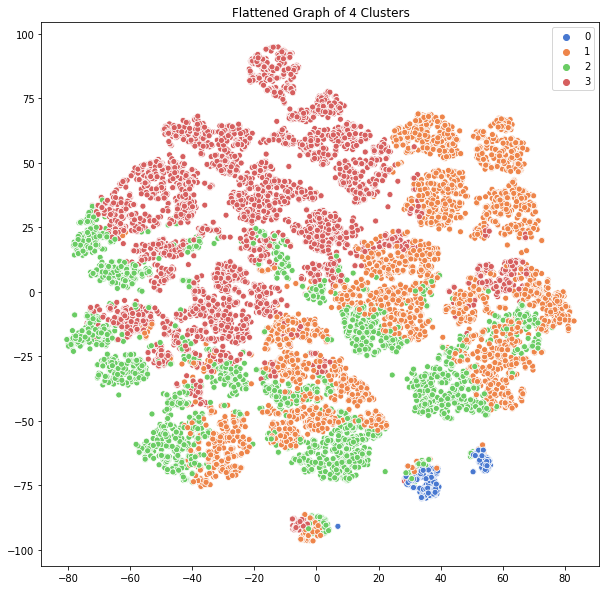

In [38]:
#get plot and cluster analysis
ca_df1 = kmeans_cluster(df1,X1_sc, 4)
ca_df1.T

**Observations**:
- Very messy clusters, unable to see defined area. As we fitted with all our 37 features, this could be the curse of dimensionality?

##### 2.1.4.2 Without Demographics Data: DF2 - Using n_clusters = 3

cluster,0,1,2
days_as_member,769.101512,581.051211,744.696629
bogo_received,1.438445,1.840830,2.382022
bogo_viewed,1.192225,1.568858,2.123596
bogo_completed,0.015119,0.000000,1.119850
bogo_rewarded,0.464363,0.166090,6.947566
bogo_viewed_rate,0.690976,0.742828,0.909067
bogo_conversion_rate,0.009719,0.000000,0.625476
discount_received,2.429806,1.630450,1.490637
discount_viewed,1.974082,1.233910,1.056180
discount_completed,1.231102,0.000000,0.359551


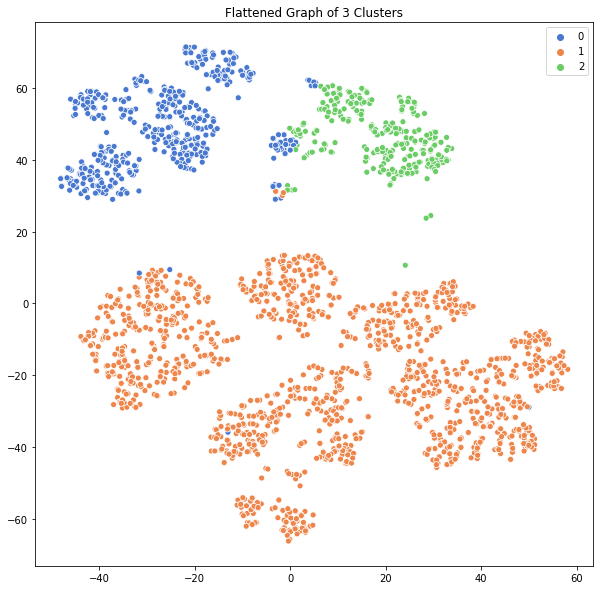

In [39]:
ca_df2 = kmeans_cluster(df2, X2_sc, 3)
ca_df2.T

**Observations**: Here the clusters look very clearly defined, but also very sparsed.

### 2.2 Dimensionality Reduction using PCA

Dimensionality reduction refers to (approximately) reducing the number of features we use in our model. It has a number of advantages:
- Increases computational efficiency when fitting models.
- Can help with addressing a multicollinearity problem.
- Makes visualization simpler (or feasible).

Principal component analysis (PCA) is a method of dimensionality reduction that **identifies important relationships** in our data, **transforms the existing data** based on these relationships, and then **quantifies the importance** of these relationships so we can keep the most important relationships and drop the others. This is how it works:
1. Look at how all of the $X$ variables relate to one another and summarize these relationships. (linear combinations of current predictor variables that create new "principal components," where these principal components explain the maximum possible amount of variance in your predictors.)
2. Then, take this summary and look at which combinations of our $X$ variables are most important.


We are going to use PCA in order to reduce the number of features from 37 (df1) / 29 (df2), based on the best n-components method.


#### 2.2.1 Identify number of components

##### 2.2.1.1 With Demographic Data: DF1

Explained variance (first 20 components): [0.228 0.129 0.102 0.081 0.077 0.056 0.047 0.039 0.029 0.027 0.022 0.022
 0.021 0.02  0.017 0.016 0.014 0.009 0.008 0.006]
------
Cumulative explained variance (first 20 components): [0.228 0.357 0.459 0.54  0.617 0.673 0.72  0.759 0.789 0.816 0.838 0.861
 0.882 0.902 0.919 0.934 0.948 0.957 0.965 0.971]
------
PCA components that explained at least 95% variance : 17


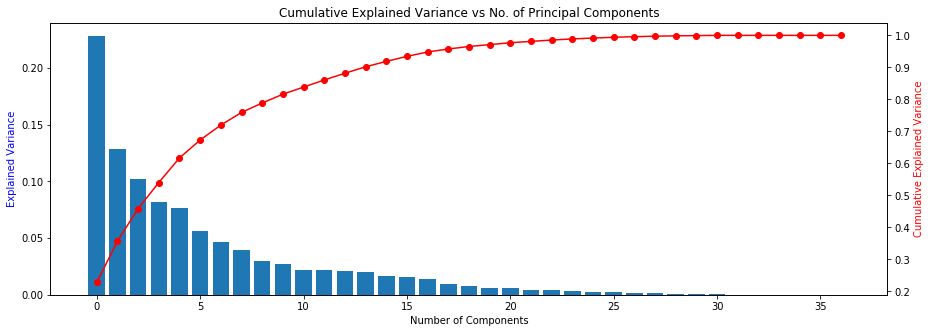

In [40]:
# instantiate
pca = PCA()

# fit transform
X1_pca = pca.fit_transform(X1_sc)

# check components number should be the same as total features
components_total = len(pca.explained_variance_ratio_)

# generate sequence for plotting
components = np.arange(components_total)

# generate cumulative sum
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(variance[:20],3)}')

print('------')

# Generate the cumulative explained variance.
print(f'Cumulative explained variance (first 20 components): {np.round(cumulative_variance[:20],3)}')

print('------')

# number of PCA components that explains 95% of variance
print(f'PCA components that explained at least 95% variance : {np.where(cumulative_variance >= 0.95)[0][0]}')

# plot: investigate the variance accounted for by each principal component.
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.bar(components,variance)
ax1.set_ylabel('Explained Variance', color="blue")
ax1.set_xlabel('Number of Components')
ax2 = ax1.twinx() 
ax2.plot(cumulative_variance, color="red",marker='o')
ax2.set_ylabel('Cumulative Explained Variance', color="red")
plt.title("Cumulative Explained Variance vs No. of Principal Components");

**Observations**: 
- 17 features would have explained 95% of our variance. 
- We will thus use n_components = 17 for PCA and fit our scaled data.

##### 2.2.1.2 Without Demographic Data: DF2

Explained variance (first 20 components): [0.272 0.117 0.109 0.092 0.078 0.07  0.051 0.042 0.029 0.025 0.021 0.019
 0.015 0.012 0.01  0.008 0.007 0.005 0.004 0.003]
------
Cumulative explained variance (first 20 components): [0.272 0.389 0.498 0.59  0.667 0.738 0.788 0.831 0.86  0.885 0.906 0.925
 0.94  0.952 0.962 0.971 0.977 0.983 0.987 0.99 ]
------
PCA components that explained at least 95% variance : 13


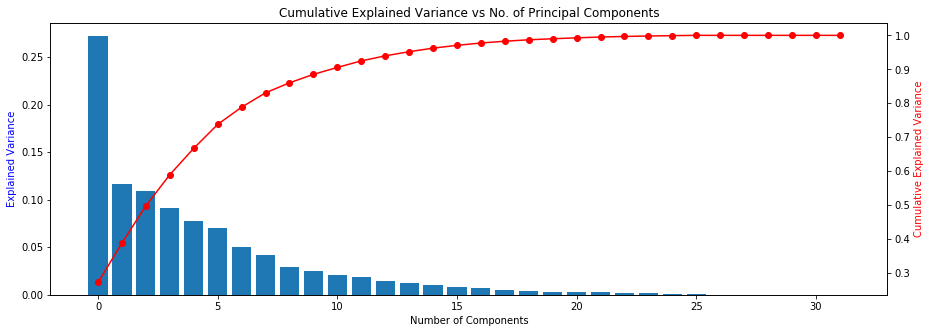

In [112]:
# instantiate
pca = PCA()

# fit transform
X2_pca = pca.fit_transform(X2_sc)

# check components number should be the same as total features
components_total = len(pca.explained_variance_ratio_)

# generate sequence for plotting
components = np.arange(components_total)

# generate cumulative sum
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(variance[:20],3)}')

print('------')

# Generate the cumulative explained variance.
print(f'Cumulative explained variance (first 20 components): {np.round(cumulative_variance[:20],3)}')

print('------')

# number of PCA components that explains 95% of variance
print(f'PCA components that explained at least 95% variance : {np.where(cumulative_variance >= 0.95)[0][0]}')

# plot: investigate the variance accounted for by each principal component.
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.bar(components,variance)
ax1.set_ylabel('Explained Variance', color="blue")
ax1.set_xlabel('Number of Components')
ax2 = ax1.twinx() 
ax2.plot(cumulative_variance, color="red",marker='o')
ax2.set_ylabel('Cumulative Explained Variance', color="red")
plt.title("Cumulative Explained Variance vs No. of Principal Components");

In [41]:
#Here we wll instantiate a pca with 17 components for df1
pca = PCA(n_components = 17)

#fit
X1pca_sc = pca.fit_transform(X1_sc)

In [113]:
#Here we wll instantiate a pca with 13 components for df2
pca = PCA(n_components = 13)

#fit
X2pca_sc = pca.fit_transform(X2_sc)

### 2.2.1 Hyperparameter Tuning: Searching for optimal number of cluster after PCA

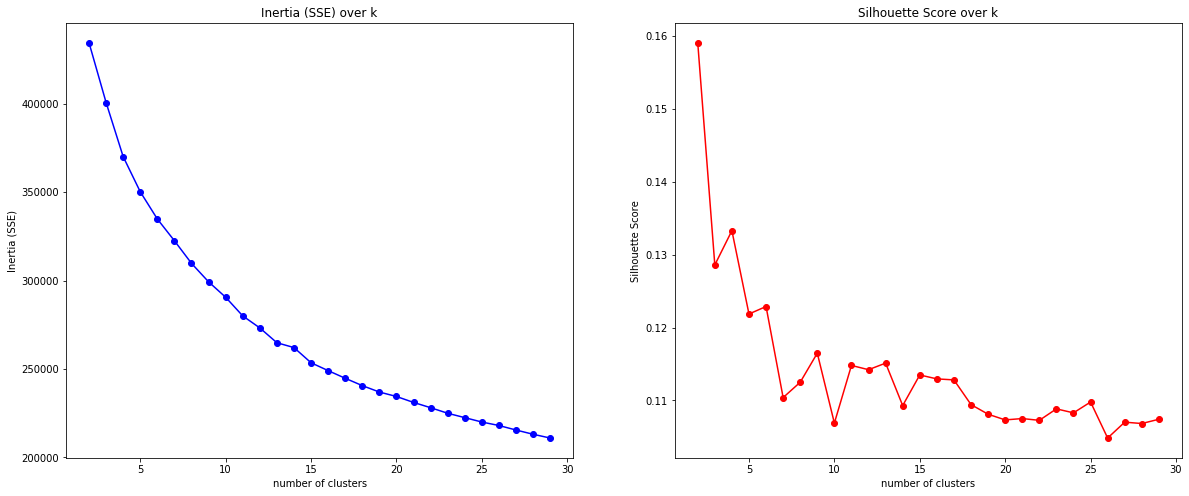

In [42]:
search_cluster_num(X1pca_sc,2,30)

**Observations**:
- There is no clear elbow for inertia.
- Silhouette score at 4 clusters is highest following some fluctuations before that, afterwhich it has a steep drop.

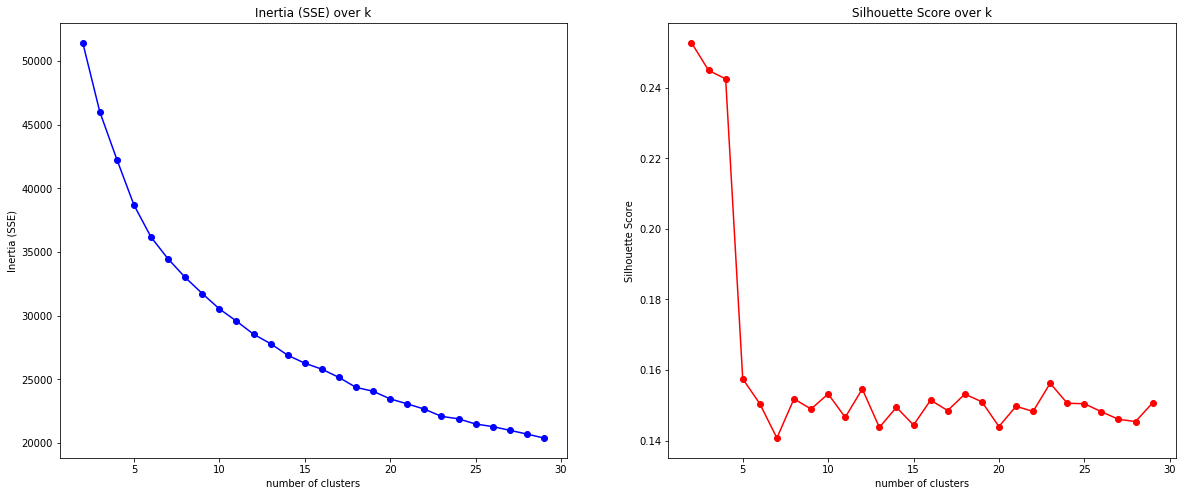

In [114]:
search_cluster_num(X2pca_sc,2,30)

**Observations**:
- There is no clear elbow for inertia.
- Silhouette score at 4 clusters is highest followed by a steep drop.

### 2.2.2 K Means Clustering after PCA

,age,income,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency,gender_F,gender_M,gender_O
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,56.900369,76763.837638,722.726937,1.859779,1.586716,1.206642,11.955720,0.780391,0.640542,1.926199,1.549815,1.236162,5.088561,0.705181,0.627391,0.856089,0.608856,0.414517,4.642066,3.745387,2.442804,0.805476,0.648845,19.959410,10.143911,2.254613,7.889299,791.497306,223.220923,568.276384,97.179705,12.482399,604.822841,8.973269,0.498155,0.490775,0.011070
1,56.933688,71920.639148,752.288948,2.803995,2.548069,1.942743,17.272969,0.921575,0.788283,1.384820,1.059920,0.819441,3.384288,0.651270,0.565471,0.665779,0.476698,0.369131,4.854594,4.084687,2.762184,0.847321,0.694930,25.559254,9.903862,2.523569,7.380293,163.854306,48.670495,115.183811,18.259478,10.802410,31.228154,8.927064,0.517976,0.463382,0.018642
2,52.171354,59484.890830,533.823755,1.748297,1.328384,0.226725,2.882096,0.691975,0.163661,1.480524,0.728734,0.099913,0.948472,0.391923,0.082270,1.037904,0.609083,0.396838,4.266725,2.666201,0.326638,0.629949,0.139479,17.702358,5.642445,0.310218,5.332227,43.852756,4.529434,39.323322,8.640391,5.219312,14.181029,7.916943,0.312140,0.676681,0.011179
3,54.887071,66656.089870,790.551045,1.082972,0.851596,0.409145,4.464919,0.631195,0.366969,2.456839,1.959204,1.615688,5.597556,0.827631,0.858622,0.911707,0.619432,0.426885,4.451518,3.430233,2.024832,0.778891,0.620374,15.076074,10.188609,1.861253,8.327355,128.866066,31.473427,97.392639,15.096642,8.716768,26.711094,8.960857,0.445802,0.539417,0.014781


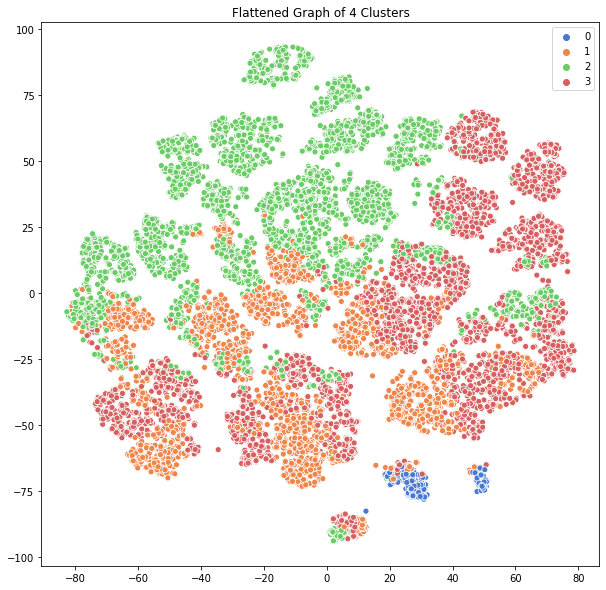

In [43]:
ca_df1_pca = kmeans_cluster(df1, X1pca_sc, 4)
ca_df1_pca

**Observations**: Clusters do not look defined. Reds and oranges are mixed all over.

,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,738.111111,2.358025,2.111111,1.123457,6.769547,0.915173,0.634103,1.473251,1.016461,0.325103,0.925926,0.568321,0.233872,0.855967,0.584362,0.392663,4.687243,3.711934,1.448560,0.799519,0.437292,7.695473,9.218107,1.296296,7.921811,28.154774,10.292305,17.862469,3.379465,0.687160,9.570741,8.852868
1,580.887889,1.840138,1.568166,0.000000,0.166090,0.742136,0.000000,1.630450,1.235294,0.000000,0.029066,0.631283,0.000000,0.914187,0.650519,0.453553,4.384775,3.453979,0.000000,0.787433,0.000000,0.195156,5.324567,0.000000,5.324567,11.260436,0.000000,11.260436,2.036844,0.616533,4.344159,7.890604
2,792.877193,1.912281,1.649123,0.508772,4.298246,0.824579,0.270439,2.175439,1.842105,1.070175,3.368421,0.811439,0.571649,0.912281,0.701754,0.435684,5.000000,4.192982,1.578947,0.834474,0.393772,7.666667,10.368421,1.368421,9.000000,103.621579,71.359298,32.262281,14.128596,0.674035,80.228246,8.947333
3,768.858140,1.444186,1.193023,0.009302,0.418605,0.684314,0.004651,2.420930,1.958140,1.223256,3.146512,0.835986,0.713888,0.823256,0.558140,0.404844,4.688372,3.709302,1.232558,0.794377,0.375940,3.565116,10.395349,1.165116,9.230233,26.720581,5.824116,20.896465,2.756000,0.416116,7.604558,9.002519


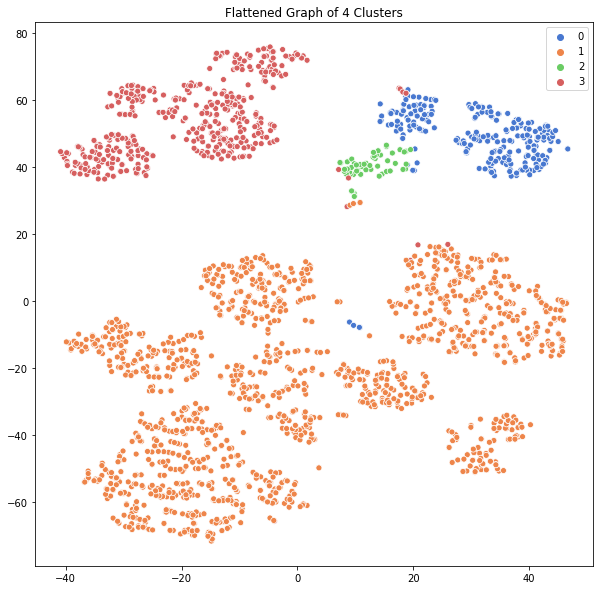

In [115]:
ca_df2_pca = kmeans_cluster(df2, X2pca_sc, 4)
ca_df2_pca

**Observations**: Clusters look ok, but there is no clear relationship in cluster breakdown.

### 2.3 Dimensionality Reduction: Correlation Filter

#### 2.3.1 Correlation Matrix

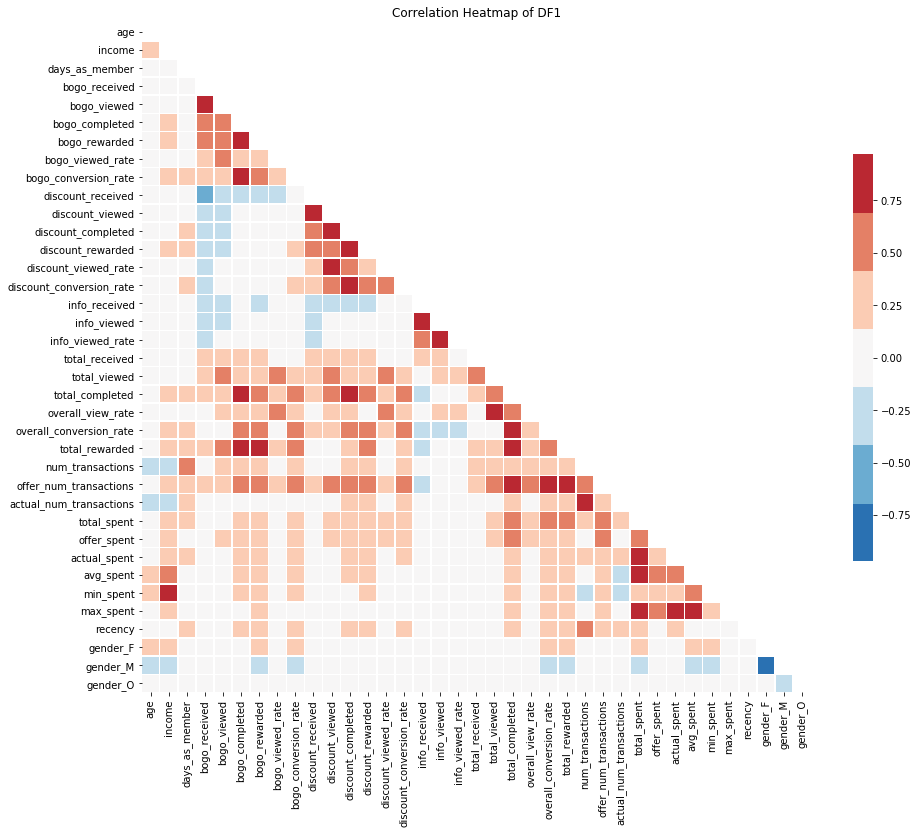

In [62]:
#drop the cluster previously assigned to it.
#df1.drop(columns = 'cluster', inplace=True)

mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),
            mask = mask,            
            square=True,
            cbar_kws = {'shrink':0.5},
            linewidth = 0.5,
            linecolor = 'white',
            cmap=sns.color_palette("RdBu_r", 7))

plt.title("Correlation Heatmap of DF1"); 

**Observations**:

Looking at the correlation matrix, we identified features showing colinearity / multicolinearity:
- ???

#### 2.3.2 Feature Selection

In [11]:
#defining our features for df1
X1f = df1[['age', 'income', 'days_as_member', 'gender_F', 'gender_M', 'gender_O','bogo_viewed_rate', 'bogo_conversion_rate', 'discount_viewed_rate', 'discount_conversion_rate', 
           'info_viewed_rate', 'num_transactions', 'total_spent', 'total_rewarded', 'recency' ]]

#defining our features for df2
X2f = df2[['days_as_member','bogo_viewed_rate', 'bogo_conversion_rate', 'discount_viewed_rate', 'discount_conversion_rate', 
           'info_viewed_rate', 'num_transactions', 'total_spent', 'total_rewarded', 'recency']]

#### 2.3.3 Feature Scaling

In [12]:
#scale and fit df1 selected features
ss1f = StandardScaler()

X1f_sc = ss1f.fit_transform(X1f)

In [13]:
#scale and fit df2 selected features
ss2f = StandardScaler()

X2f_sc = ss2f.fit_transform(X2f)

#### 2.3.4 Hyperparameter Tuning: Searching for optimal number of clusters

##### 2.3.4.1 With Demographics: DF1

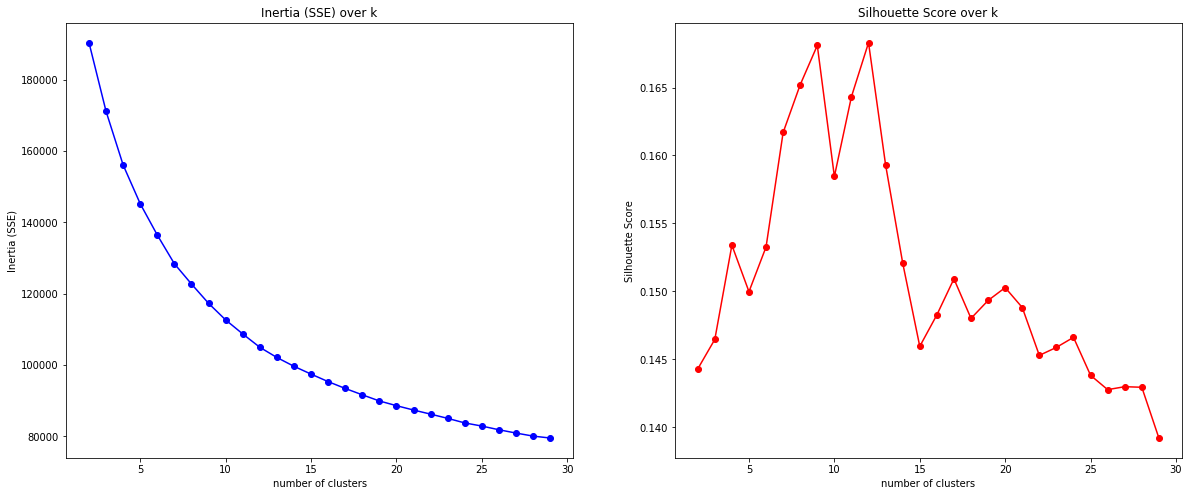

In [17]:
search_cluster_num(X1f_sc, 2, 30)

**Observations**:
- Inertia / SSE: No obvious elbow, but significant drop between cluster 2 to 5.
- Silhouette: 
    - 9 clusters: Highest point, rose from previous cluster and followed by drop

##### 2.3.4.2 Without Demographics: DF2

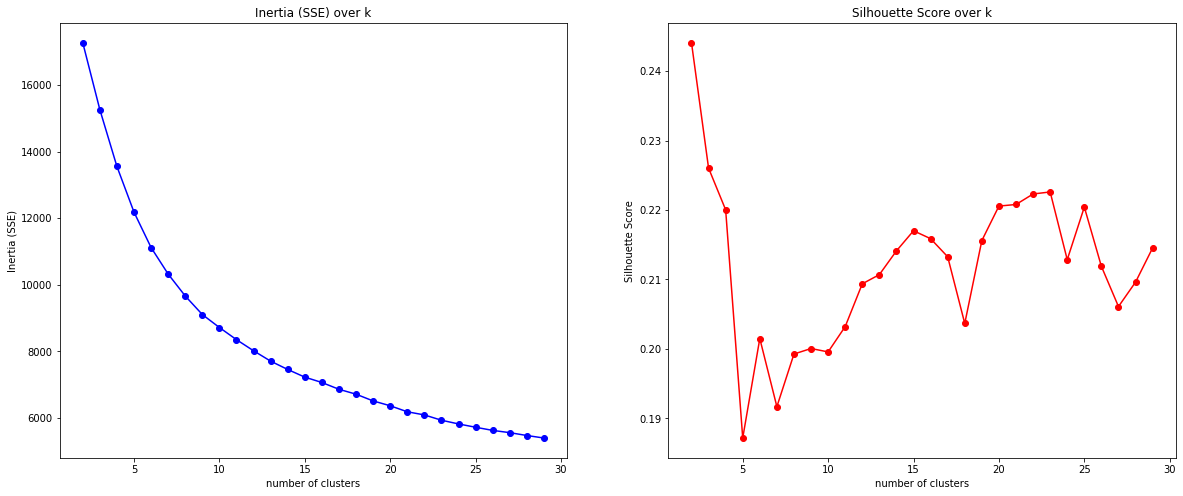

In [18]:
search_cluster_num(X2f_sc, 2, 30)

**Observations**: 
For the dataset without demographics:
- Inertia / SSE: No clear elbow, but the inertia decreases more significantly from 2 to 6. 
- Silhouette: 
    - 4 clusters: Significant drop after that.

#### 2.3.5 K Means Clustering

##### 2.3.5.1 With Demographics Data: DF1 - Using n_cluster = 4


,age,income,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency,gender_F,gender_M,gender_O
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,56.742754,76130.434783,737.286232,1.942029,1.673913,1.289855,12.644928,0.787877,0.650681,1.942029,1.557971,1.239130,5.108696,0.714145,0.633536,0.836957,0.590580,0.403384,4.721014,3.822464,2.528986,0.808942,0.655272,17.753623,10.724638,2.340580,8.384058,789.718152,216.113804,573.604348,93.950978,12.277899,595.454746,8.988547,0.496377,0.492754,0.010870
1,58.558704,73473.684211,381.929150,1.690283,1.388664,0.060729,0.657895,0.704838,0.033565,1.882591,1.419028,0.068826,0.311741,0.672883,0.037850,0.823887,0.548583,0.386136,4.396761,3.356275,0.129555,0.744767,0.039474,0.969636,0.655870,0.127530,0.528340,11.005526,2.794332,8.211194,5.490789,4.710526,6.352895,1.234142,0.421053,0.556680,0.022267
2,51.682785,57738.481013,501.044304,1.753165,1.336456,0.105570,1.716456,0.670731,0.050384,1.582025,0.802278,0.069367,0.750127,0.407157,0.031317,0.994937,0.575696,0.382780,4.330127,2.714430,0.174937,0.627942,0.048902,2.466582,5.335949,0.170127,5.165823,34.912800,2.635671,32.277129,8.283830,5.194843,13.025339,8.434006,0.300506,0.689114,0.010380
3,56.283258,69965.398668,756.621105,2.017193,1.836879,1.447668,12.748764,0.931781,0.828044,1.980658,1.684720,1.382764,4.885235,0.887038,0.831986,0.741457,0.539222,0.403147,4.739308,4.060821,2.830432,0.863585,0.714299,17.634000,10.197292,2.589727,7.607565,163.209938,48.464047,114.745891,17.498137,10.138496,29.510129,8.987365,0.482699,0.497958,0.019342
4,53.584327,63376.936830,772.263111,1.083731,0.730334,0.024136,1.997914,0.430238,0.009581,2.370083,1.816448,1.517878,4.999106,0.803732,0.873219,0.935936,0.587902,0.398964,4.389750,3.134684,1.542014,0.723577,0.532459,6.997020,9.923719,1.432658,8.491061,100.165501,21.866889,78.298611,12.751856,7.157753,23.579070,8.942181,0.389750,0.597139,0.013111
5,55.311546,69662.213740,765.524332,2.489504,2.146469,1.610687,14.615935,0.878699,0.788321,0.848760,0.132634,0.001908,1.853053,0.055960,0.000954,1.021469,0.665553,0.432969,4.359733,2.944656,1.612595,0.687207,0.585644,16.468989,8.981393,1.463740,7.517653,132.545983,27.934427,104.611555,16.883841,9.839719,29.824079,8.831949,0.497615,0.491412,0.010973


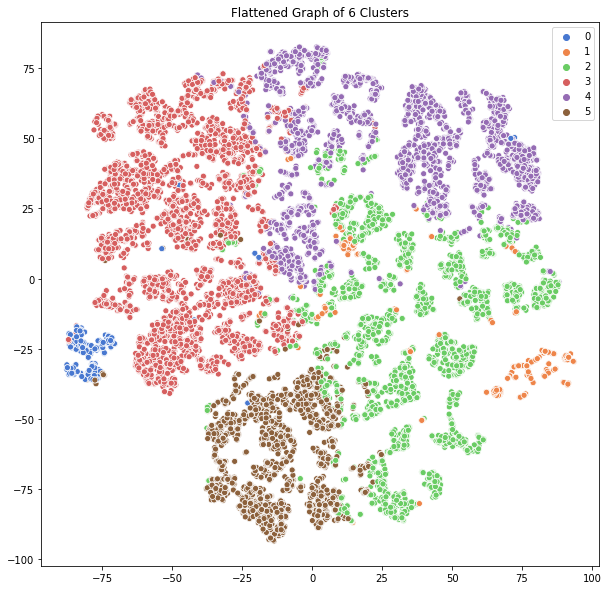

In [21]:
ca_df1f_6 = kmeans_cluster(df1, X1f_sc, 6)
ca_df1f_6

**Observations**: The clusters look defined, however looking at the cluster breakdown, we are not getting very distinct differences across some attributes (e.g. num transactions, recency, days as members.) We will try a larger number of clusters.

##### 2.3.5.2 With Demographics Data: DF1 - Using n_cluster = 9

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,income,days_as_member,gender_F,gender_M,gender_O,bogo_viewed_rate,bogo_conversion_rate,discount_viewed_rate,discount_conversion_rate,info_viewed_rate,num_transactions,total_spent,total_rewarded,recency
cluster,,,,,,,,,,,,,,,
0,56.644664,70674.239177,727.498928,0.000000,1.000000,0.0,0.909392,0.760544,0.896087,0.828595,0.409452,9.522932,160.773129,17.185598,8.955932
1,49.841746,55777.019002,394.067993,0.000000,1.000000,0.0,0.632793,0.066908,0.493825,0.194263,0.365415,5.298100,34.905629,2.929038,8.486096
2,57.310896,73219.053052,749.377638,0.588705,0.411295,0.0,0.879176,0.818525,0.038832,0.000000,0.454746,8.402168,142.935043,17.570451,8.773922
3,57.161713,68523.601399,547.636364,1.000000,0.000000,0.0,0.478803,0.044822,0.612587,0.433593,0.394412,5.960664,80.309637,5.547203,8.484261
4,47.218529,51885.013624,1231.363488,0.072480,0.927520,0.0,0.615209,0.128101,0.635786,0.691662,0.403010,14.904632,86.265319,6.712262,9.231527
5,54.400943,63287.735849,645.183962,0.000000,0.000000,1.0,0.760311,0.502208,0.726028,0.547415,0.493712,8.400943,124.323302,11.476415,8.359274
6,58.267230,72881.606765,742.570402,1.000000,0.000000,0.0,0.918126,0.799742,0.880723,0.843624,0.400813,9.976744,177.286178,17.945032,8.981729
7,59.016355,73873.831776,382.971963,0.434579,0.565421,0.0,0.699231,0.019857,0.657874,0.025388,0.382790,0.462617,8.194790,0.647196,0.790498
8,57.090535,78786.008230,743.012346,0.514403,0.485597,0.0,0.765239,0.633761,0.704815,0.618403,0.390263,10.641975,824.239136,17.510288,8.990082


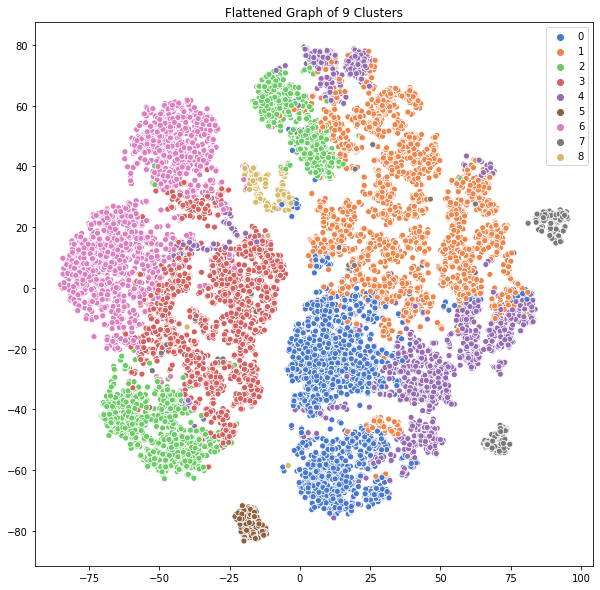

In [19]:
ca_df1f_9 = kmeans_cluster(X1f, X1f_sc, 9)
ca_df1f_9

**Observations**:

##### 2.3.5.3 Without Demographics Data: DF2 - Using n_cluster = 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,bogo_viewed_rate,bogo_conversion_rate,discount_viewed_rate,discount_conversion_rate,info_viewed_rate,num_transactions,total_spent,total_rewarded,recency
cluster,,,,,,,,,
0,0.736172,0.004354,0.617690,0.008983,0.453922,5.719940,12.160254,0.319642,8.580226
1,0.699200,0.009124,0.836120,0.722900,0.424426,10.873614,33.725565,3.669623,9.030670
2,0.910277,0.667591,0.565855,0.241037,0.372248,9.636364,36.466405,8.404959,8.895653
3,0.801881,0.000000,0.803622,0.000000,0.422497,0.699301,1.339441,0.034965,1.536706


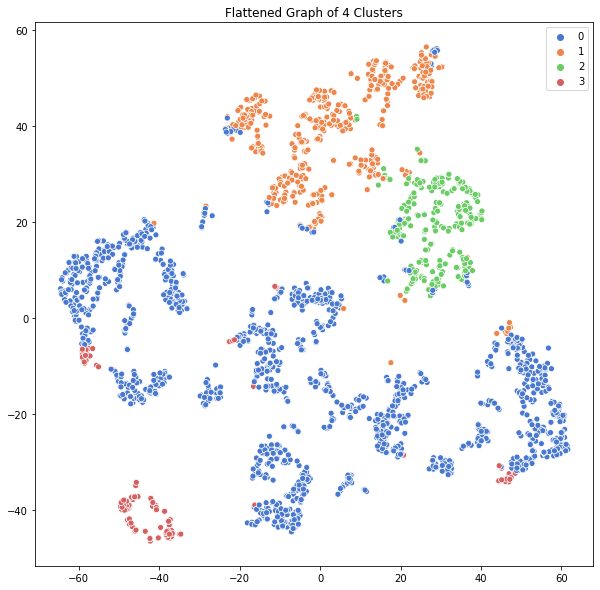

In [16]:
ca_df2f_5 = kmeans_cluster(X2f, X2f_sc, 4)
ca_df2f_5

**Observations**:

### 2.4 Selecting Segmentation Attributes only

After many iterations / experimentations with different features, I've decided to use only offer-related / behavioural attributes for segmentation (segmentation attributes), and use the remaining demographic (profiling attributes) only to profile the clusters. 

In our case, segmentation attributes are: `bogo_viewed_rate`, `bogo_conversion_rate`, `discount_viewed_rate`, `discount_conversion_rate`, `info_viewed_rate`, `offer_num_transactions`, `actual_num_transactions`, `offer_spent`, `actual_spent`, `total_rewarded`, `recency`

Since we will not be using the demographic attributes to segment, we no longer need to split up the dataset.

#### 2.4.1 Feature Selection

In [23]:
X = df[['bogo_viewed_rate', 'bogo_conversion_rate', 'discount_viewed_rate', 'discount_conversion_rate', 
           'info_viewed_rate', 'offer_num_transactions', 'actual_num_transactions','offer_spent', 
        'actual_spent','total_rewarded', 'recency']]

#### 2.4.2 Feature Scaling

In [24]:
#scale and fit df1 selected features
ss = StandardScaler()

X_sc = ss.fit_transform(X)

#### 2.4.3 Hyperparameter Tuning: Searching for optimal number of clusters

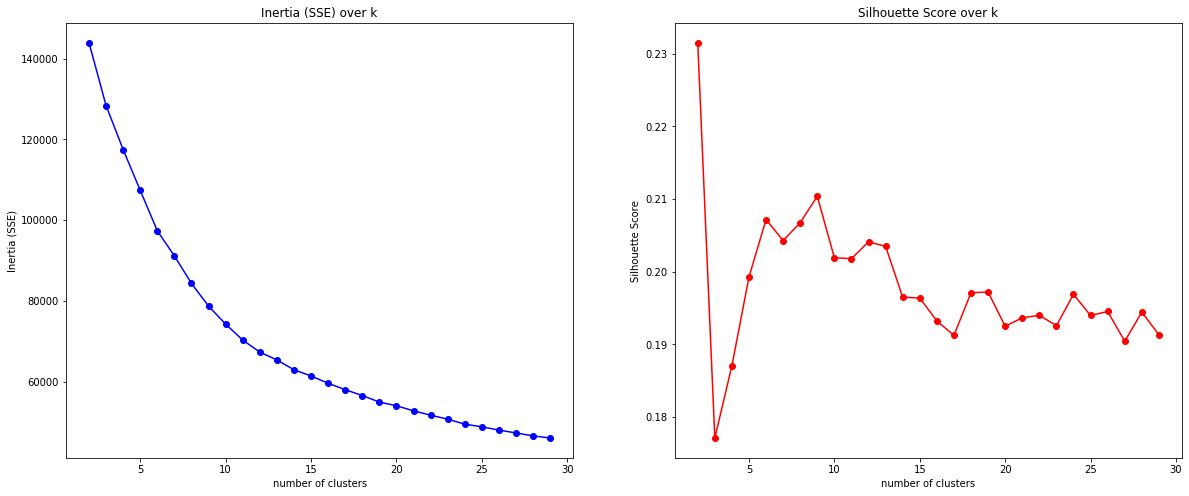

In [25]:
search_cluster_num(X_sc, 2, 30)

**Observations**:
- Inertia / SSE: No clear elbow.
- Silhouette: 
    - 9 clusters - highest point before it declines further.

#### 2.4.4 K Means Clustering

,age,income,days_as_member,bogo_received,bogo_viewed,bogo_completed,bogo_rewarded,bogo_viewed_rate,bogo_conversion_rate,discount_received,discount_viewed,discount_completed,discount_rewarded,discount_viewed_rate,discount_conversion_rate,info_received,info_viewed,info_viewed_rate,total_received,total_viewed,total_completed,overall_view_rate,overall_conversion_rate,total_rewarded,num_transactions,offer_num_transactions,actual_num_transactions,total_spent,offer_spent,actual_spent,avg_spent,min_spent,max_spent,recency,gender_F,gender_M,gender_O,gender_U
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,51.209476,56396.508728,594.055762,1.889828,1.382900,0.084488,1.630618,0.627635,0.035087,1.227104,0.217303,0.000676,0.574856,0.080946,0.000338,1.066914,0.621156,0.394018,4.183846,2.221359,0.085164,0.538088,0.030586,2.205475,6.006083,0.080433,5.925651,33.620345,0.906678,32.713667,6.625830,3.675948,11.502639,8.502475,0.239608,0.565732,0.007773,0.186887
1,57.066601,71781.697089,751.387845,2.020747,1.835489,1.497925,13.137662,0.930162,0.848384,2.010251,1.731267,1.486209,5.094459,0.892897,0.874488,0.730535,0.536490,0.404831,4.761533,4.103246,2.984135,0.868214,0.746776,18.232121,9.608494,2.743959,6.864535,167.528472,52.655546,114.872927,18.336231,10.731626,30.247081,8.973346,0.494996,0.474005,0.020503,0.010495
2,56.139185,70817.167798,744.111531,2.428166,2.079868,1.641304,14.801512,0.873803,0.833520,0.917769,0.215974,0.016068,1.921550,0.104205,0.008585,1.015123,0.658318,0.429862,4.361059,2.954159,1.657372,0.689723,0.601384,16.723062,8.571834,1.493384,7.078450,131.457580,28.448587,103.008993,17.101267,10.123195,28.804286,8.803883,0.495274,0.467864,0.011342,0.025520
3,48.413793,52106.896552,959.710432,1.889089,1.655875,0.312950,3.797962,0.873054,0.161156,2.155875,1.588729,1.333933,4.258993,0.769918,0.846951,0.724221,0.449640,0.330718,4.769185,3.694245,1.646882,0.782644,0.460791,8.056954,16.107914,1.550959,14.556954,93.586745,15.593273,77.993471,6.343969,2.153813,18.369562,9.296329,0.242806,0.618106,0.008393,0.130695
4,55.951691,73816.425121,737.260870,1.898551,1.584541,1.178744,12.125604,0.764184,0.620792,1.840580,1.434783,1.120773,4.797101,0.664749,0.576986,0.927536,0.652174,0.435589,4.666667,3.671498,2.299517,0.784715,0.619986,16.922705,11.357488,2.164251,9.193237,770.285072,42.129130,728.155942,86.107488,11.748502,576.364976,9.009285,0.487923,0.502415,0.009662,0.000000
5,57.651163,76941.860465,708.616279,2.034884,1.837209,1.488372,13.313953,0.841291,0.709314,2.058140,1.732558,1.406977,5.500000,0.790709,0.725814,0.674419,0.465116,0.337209,4.767442,4.034884,2.895349,0.847267,0.727535,18.813953,9.046512,2.616279,6.430233,772.546977,624.016163,148.530814,105.811395,12.379535,594.416047,8.938000,0.511628,0.476744,0.011628,0.000000
6,54.952197,67504.587156,692.556930,0.554371,0.103198,0.000000,1.545842,0.045910,0.000000,2.510021,1.946695,1.276333,4.498507,0.809759,0.694810,1.092964,0.699787,0.450498,4.157356,2.749680,1.276333,0.677294,0.507076,6.044350,7.692537,1.171002,6.521535,95.879348,19.969147,75.910200,13.495689,7.932942,22.837301,8.758923,0.384222,0.486994,0.011940,0.116844
7,53.602339,62119.883041,479.248563,1.866419,1.692594,0.180250,1.964829,0.931898,0.099377,1.898546,1.619885,0.383497,1.317213,0.891071,0.230533,0.830572,0.554954,0.405648,4.595536,3.867433,0.563747,0.847583,0.148991,3.282043,5.194792,0.514711,4.680081,34.139746,7.892922,26.246824,8.388887,5.332891,13.083585,8.442172,0.239094,0.446398,0.008455,0.306053
8,58.418764,73654.462243,382.877876,1.684956,1.419469,0.026549,0.300885,0.717150,0.015042,1.911504,1.500885,0.031858,0.138053,0.697324,0.017462,0.814159,0.550442,0.398674,4.410619,3.470796,0.058407,0.771264,0.018083,0.438938,0.460177,0.058407,0.401770,6.037752,1.377133,4.660619,3.268584,2.838779,3.743894,0.857228,0.329204,0.424779,0.019469,0.226549


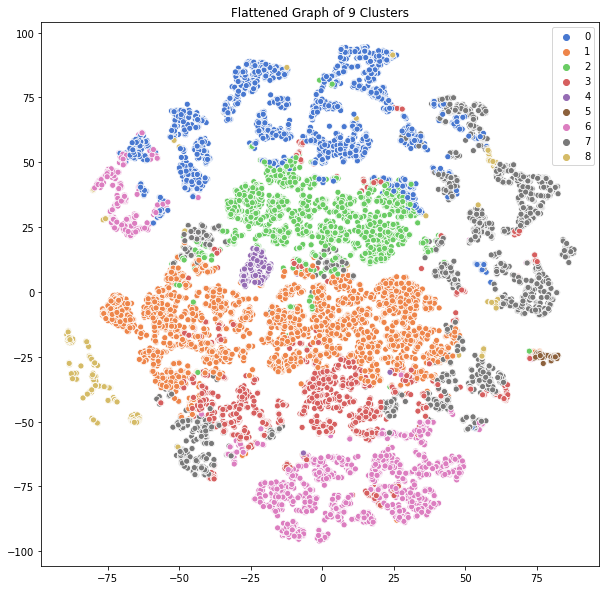

In [38]:
ca_df_9 = kmeans_cluster(df, X_sc, 9)
ca_df_9

## 3. Cluster Analysis

In [39]:
ca_df_9.T

cluster,0,1,2,3,4,5,6,7,8
age,51.209476,57.066601,56.139185,48.413793,55.951691,57.651163,54.952197,53.602339,58.418764
income,56396.508728,71781.697089,70817.167798,52106.896552,73816.425121,76941.860465,67504.587156,62119.883041,73654.462243
days_as_member,594.055762,751.387845,744.111531,959.710432,737.260870,708.616279,692.556930,479.248563,382.877876
bogo_received,1.889828,2.020747,2.428166,1.889089,1.898551,2.034884,0.554371,1.866419,1.684956
bogo_viewed,1.382900,1.835489,2.079868,1.655875,1.584541,1.837209,0.103198,1.692594,1.419469
bogo_completed,0.084488,1.497925,1.641304,0.312950,1.178744,1.488372,0.000000,0.180250,0.026549
bogo_rewarded,1.630618,13.137662,14.801512,3.797962,12.125604,13.313953,1.545842,1.964829,0.300885
bogo_viewed_rate,0.627635,0.930162,0.873803,0.873054,0.764184,0.841291,0.045910,0.931898,0.717150
bogo_conversion_rate,0.035087,0.848384,0.833520,0.161156,0.620792,0.709314,0.000000,0.099377,0.015042
discount_received,1.227104,2.010251,0.917769,2.155875,1.840580,2.058140,2.510021,1.898546,1.911504


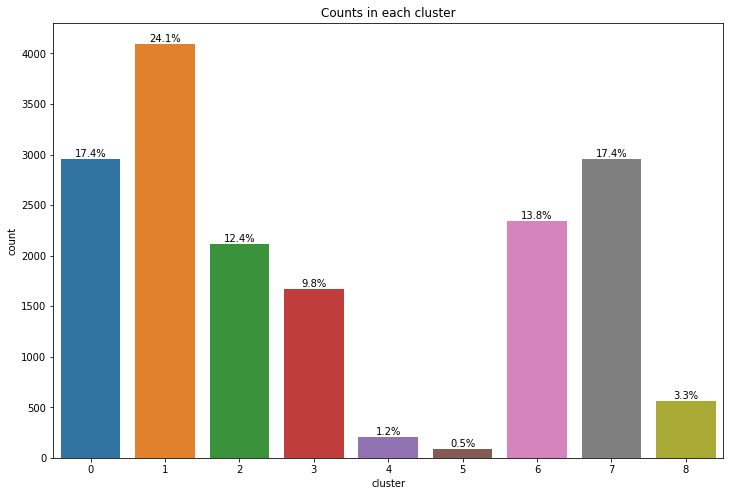

In [74]:
#plot counts in each cluster
plt.figure(figsize = (12,8))
ax = sns.countplot(df['cluster'])
plt.title('Counts in each cluster');

for p in ax.patches:
    #get the x and y locations for all 4 corners of the bar
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    
    # set the alignment of the percentage
    ax.annotate('{:.1f}%'.format(100.0*y/17000), (x.mean(), y), 
            ha='center', va='bottom') 

**Observations**: 
- Size of cluster in increasing order: 5, 4, 8, 3, 2, 6, 7, 0, 1 

In [41]:
#plot cluster distribution
def subplot_barplot(dataframe, list_of_columns):
    '''This function creates subplots of barplots by passing in a dataframe and list of columns to plot.'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,nrows*5)) 
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.barplot(x = dataframe['cluster'], y = dataframe[col], ax = ax[i])
        ax[i].set_title(f'Distribution of {col} among clusters')
        ax[i].set_xlabel('Cluster')
        ax[i].set_ylabel(col)
        ax[i].axhline(y = dataframe[col].mean(), color = 'red')
    plt.tight_layout();

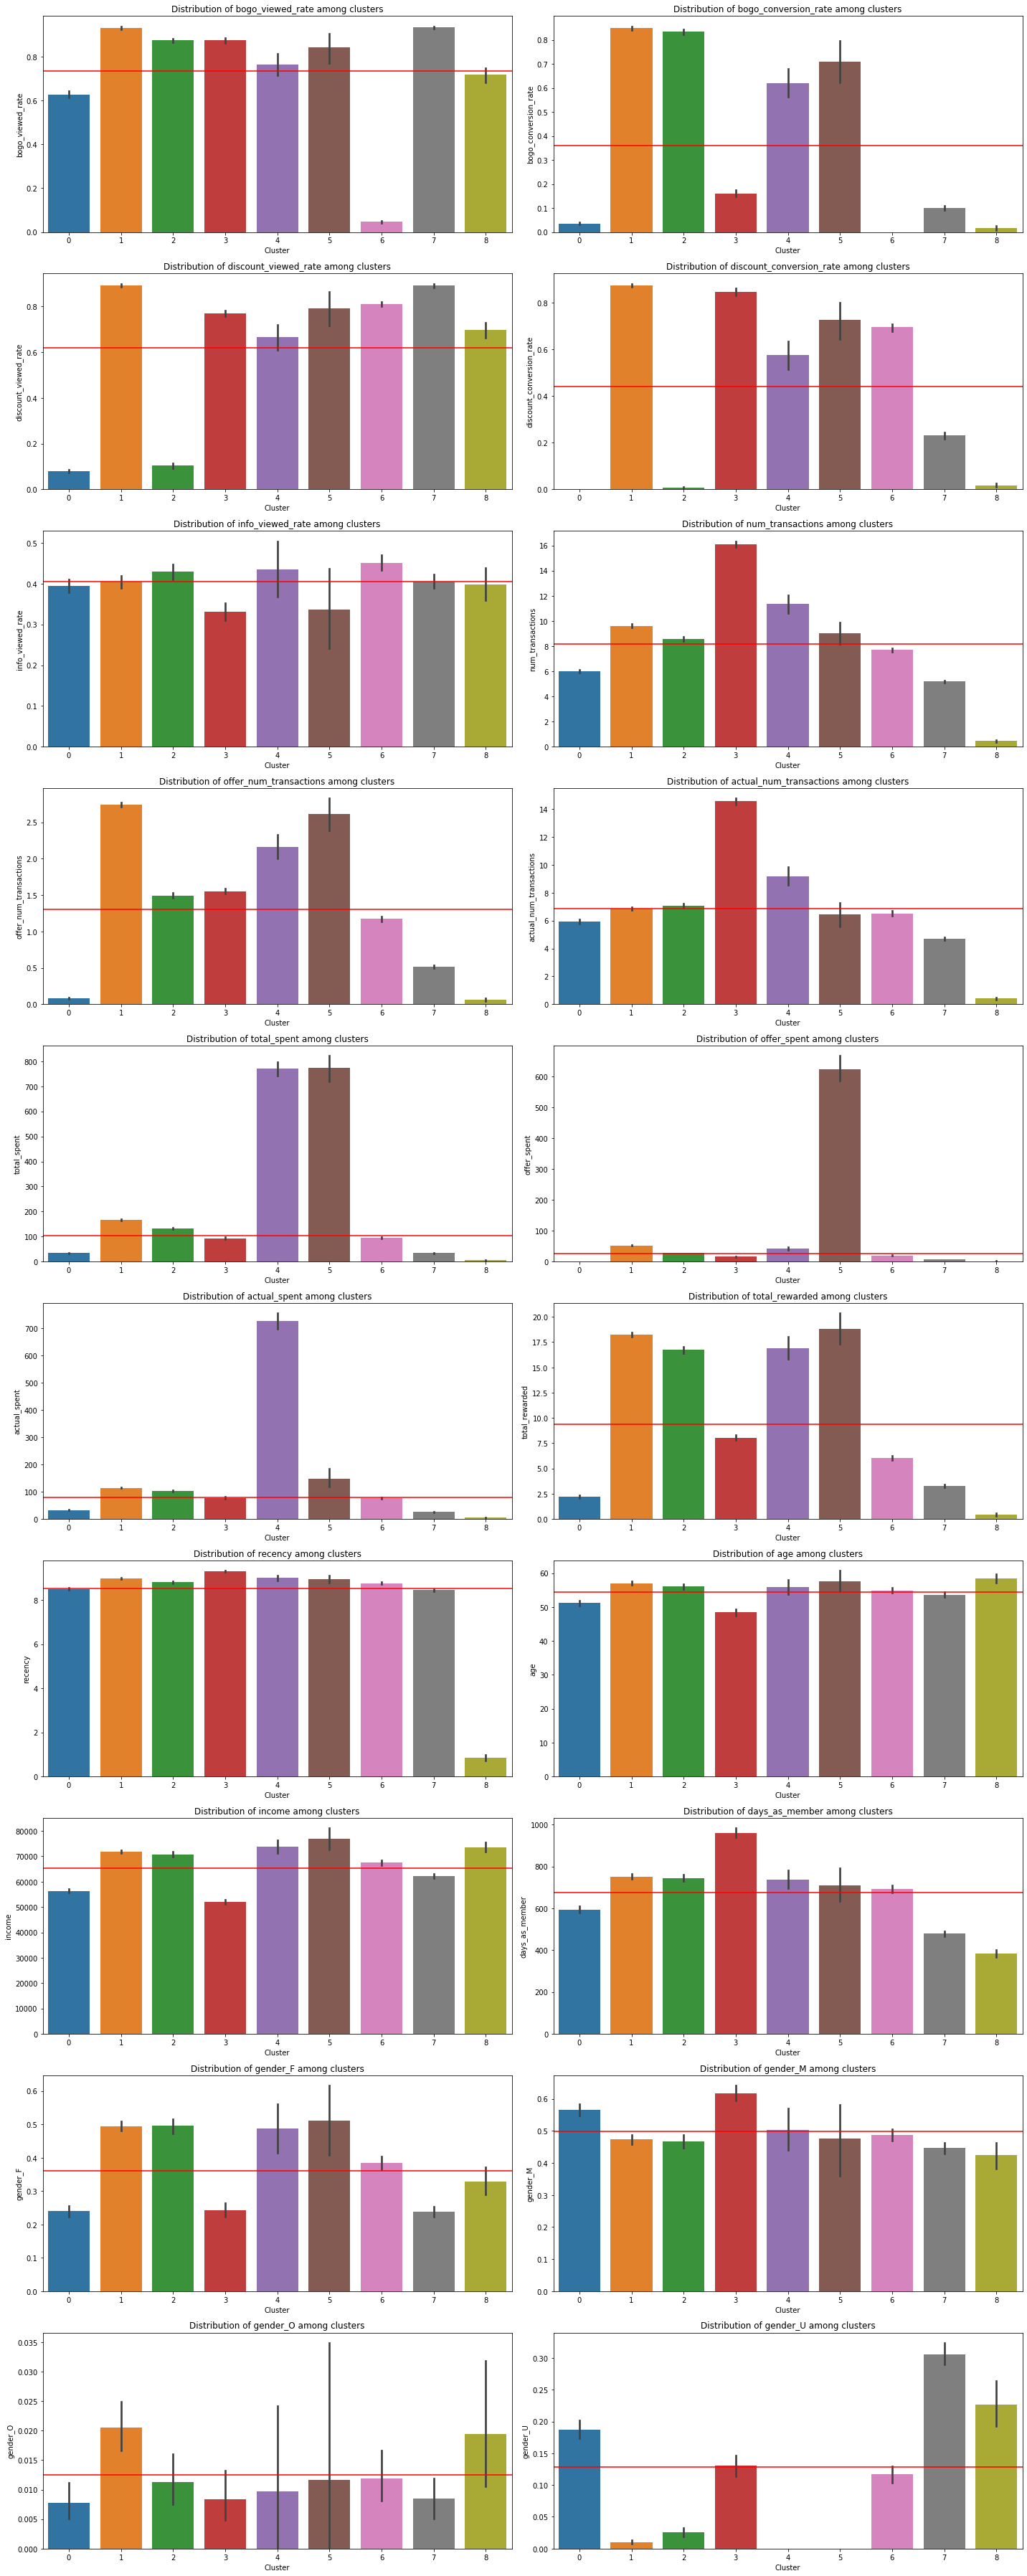

In [62]:
columns = ['bogo_viewed_rate', 'bogo_conversion_rate',
       'discount_viewed_rate', 'discount_conversion_rate', 'info_viewed_rate',
       'num_transactions', 'offer_num_transactions', 'actual_num_transactions', 
        'total_spent', 'offer_spent', 'actual_spent','total_rewarded', 'recency', 
           'age', 'income', 'days_as_member',
           'gender_F', 'gender_M', 'gender_O', 'gender_U']

subplot_barplot(df, columns)

**Observations:** Summary of all clusters

- **Cluster 0**:  *Probably a cluster that just grabs and go coffee, treats coffee as necessity.*
    - Younger, lower income
    - Responsive to informational only.
    - Low total spent, low number of transactions. 
    - Not offer driven. Mostly non-offer related spent and transactions.
    - Newer members 


- **Cluster 1**: *A cluster that is loyal to the brand and enjoys the offers*
    - Older, higher income
    - Highly responsive and high convertion rates to all offers.
    - Above average total spent and number of transactions
    - Offer-driven, highest number of offer-related transactions and high offer-related spent. 
    - Reward-driven, high number of rewards.
    - High actual spent too.
    - Long-tenure member

- **Cluster 2**: 
    - Older, higher income.
    - Highly responsive and high convertion rates to BOGO only. (and informational)
    - Above average total spent and number of transactions (with even distribution between offer and non-offer related.)
    - Reward-driven, high number of rewards.
    - Long-tenure member

- **Cluster 3**: *A cluster that is frequent, treats coffee as necessity, but also tries to take advantage of discounts to save money*
    - Younger, lowest income 
    - High responsiveness to all offers (except informational) but converts to DISCOUNT only
    - Average total spent, but highest number of total transactions and non-offer transactions.
    - Longest-tenure members.
    

- **Cluster 4**: *Advocates! A cluster that is loyal to the brand and enjoys the offers, but also spends a lot*
    - Older, higher income
    - Above average responsiveness and high convertion to all offers
    - Reward-driven, high number of rewards.
    - High total spent and number of transactions (and highest non-offer spent)
    - Long-tenure members.

- **Cluster 5**:
    - Older, highest income
    - High reponsive and convertion rates to all offers (except informational)
    - Highest total spent, above average number of transactions 
    - Offer-driven, high number of offer-related transactions and highest offer-related spent.
    - Reward-driven, highest number of rewards
    - Long-tenure member


- **Cluster 6**:
    - Old, average income
    - High responsiveness and high convertion rates to DISCOUNT (and informational).
    - Average total spent, average number of transactions.
    - Long-tenure member

- **Cluster 7**: *This is a cluster that needs a bit more convincing. They are clearly interested, but not convinced enough to patronize us given the many options available.*
    - Lower income, average age
    - Highly responsive, but below average convertion rates to all offers.
    - Low total spent and number of transactions 
    - New members

- **Cluster 8**: 
    - Higher income, older
    - Above average responsiveness to all offers but almost never converts 
    - Lowest total spent and number of transactions.
    - New member

### 3.1 Analysis of Offer Responsiveness: What offer should be sent to our customers? 

**BOGO & DISCOUNT offers**
- **Cluster 1**: 
    - Highly responsive and high convertion rates to all offers.
    - Offer-driven, highest number of offer-related transactions and high offer-related spend. 
    - Reward-driven, high number of rewards.

- **Cluster 4**:
    - Above average responsiveness and high convertion to all offers
    - High offer-related transactions and above average offer-related spend. 
    - Reward-driven, high number of rewards.

- **Cluster 5**:
    - High reponsive and convertion rates to all offers (except informational)
    - Offer-driven, high number of offer-related transactions and highest offer-related spent.
    - Reward-driven, highest number of rewards

- **Cluster 7**: 
    - Highly responsive, but below average convertion rates to all offers.

- **Cluster 8**: 
    - Above average responsiveness to all offers but almost never converts 

**BOGO Offers**
- **Cluster 2**: 
    - High responsiveness and high convertion rates to BOGO only. (and informational)
    - Reward-driven, high number of rewards.

**DISCOUNT Offers**
- **Cluster 3**:
    - High responsiveness to all offers (except informational) but converts to DISCOUNT only

- **Cluster 6**:
    - High responsive and high convertion rates to DISCOUNT (and informational).

**INFORMATIONAL Offers** 
- All clusters except 3 and 5

**NOT INTERESTED**
- **Cluster 0**:  *Probably a cluster that just grabs and go coffee, treats coffee as necessity.*
    - Below average response to BOGO, not responsive to DISCOUNTS, almost does not convert.
    - Responsive to informational only.
    - Not offer driven. Mostly non-offer related spent and transactions. 

### 3.2 Analysis of Profitability: Who are our most profitable customers? 

Here we divide the clusters into 3 levels of profitability - High, Mid, and Low. 

1. **High Profitability**: A common trait within them is that they are older in age, have high income, and are long-time members. These customers are in the **LOYAL and ACTIVE** life stage of buyers, and may potentially become ADVOCATES. Other than the usual offers, it is important to make them feel exclusive and special such as tiered benefits.  
    - **Cluster 1**: 
        - Largest proportion (24.1% of overall size) with above average total spent (high offer-related and actual spent).
        - Older age, higher income, long-tenure member

    - **Cluster 4**: *
        - Smallest proportion (1.2% of overall size) with highest total spent (highest non-offer spent)
        - Older age, higher income, long-tenure member

    - **Cluster 5**:
        - Smallest proportion (0.5% of overall size) with highest total spent (highest offer-related spent and high non-offer spent)
        - Older age, highest income, long-tenure member


2. **Mid Profitability**: These customers are in the **LOYAL and ACTIVE** life stage of buyers. We want to continue engaging them and making sure of a positive experience. 
    - **Cluster 2**:  
        - Mid-size proportion (12.5%) with above average total spent 
        - Older age, higher income, long-tenure member.

    - **Cluster 3**: 
        - Mid-size proportion (9.8%) with average total spent
        - Younger age, lowest income, longest-tenure members.

    - **Cluster 6**:
        - Mid-size proportion (13.8%) with average total spent
        - Older age, average income, long-tenure member


3. **Low Profitability**: A common trait within them is that they are all newer members. These customers are in the **AT-RISK and TRANSITIONAL** life stage of buyers. They could potentially become lapsed buyers too should we not engage them well. There is a need to reengage and drive subsequent purchases in these segments. Also, selling the brand statement is important as we would need to differentiate ourselves from other options available to these customers. Retention is important here. 
    - **Cluster 7**:
        - Large proportion (17.4%) with low total spent
        - Average age, lower income, new members

    - **Cluster 0**:  
        - Large proportion (17.4%) with low total spent
        - Younger age, lower income, newer member.

    - **Cluster 8**: 
        - Small proportion (3.3%) with lowest total spent
        - Older age, higher income, new members, do not frequent.


### 3.3 Analysis of Potential Growth: Which customers to focus for potential growth?

 - **Cluster 2**:  
    - Cluster 2 (in mid-profitability) are very similar to high profitability cluster 1 in terms of income, age, membership tenure, gender proportion, level of drive for rewards, frequency (transaction number) of spent, and average amount spent. At the moment, cluster 2 receives slightly less offers than cluster 1, we do not have information why, but customers within the mid-size cluster 2 can potentially convert to high profitability cluster 1. 
    
- **Cluster 3**:
    - Cluster 3 (in mid-profitability) are the younger and lowest income. Although their total spent is at an average level, this cluster is very frequent with highest number of transactions, and also responsive to our offers. Assuming the natural trend that our incomes tend to rise as we mature and gain work experience, customers from this cluster would potentially develop into the high-profitability section. And we want to focus on retaining them now. 


- **Cluster 0**:
    - This cluster, takes up 17.4% of our overall member sample. It is in the low-profitability section but has similar age and higher income than the mid-profitability cluster 3. The key difference is that this cluster is newer to the Rewards Program, and are at risk buyers which may eventually leave us. Even though they have below average response to BOGO and are not responsive to DISCOUNTS, they are responsive to informational offers. Hence, we want to focus on retaining them, improving their overall experience with the brand and build them into loyal and active buyers.
    
    
- **Cluster 7**:
    - Cluster 7 (in low-profitability) have below average convertion rates and spend. But, they have very high responsiveness to our offers that is almost similar to our advocates in cluster 1. Again, they are very new members. Since they already have the interest / desire in our offers, we want to develop and nurture them into the mid-profitability range with time. 

## 4. Conclusion & Recommendations

### Key Findings & Recommendations
- After identifying the valid completed offers, I realized that 25.67% of the rewards given were not actually completed due to offer influence, but completed as a result of the customer's normal behavior. Essentially, there would have been more revenue should these incorrectly given rewards were avoided.

- Although there were 116,752 non-offer transactions compared to only 22,201 offer-related transactions, the average offer-related spent per transaction was \\$19.73, compared to \\$11.46 for non-offer spent. Hence, running offers would help when we need to quickly generate additional revenue or hit sales targets. 

- Improve marketing focus: To optimize our customer acquisition costs for marketing campaigns, I have identified segments that resonate better with specific offers - BOGO only, DISCOUNT only, BOGO & DISCOUNT, INFORMATIONAL, and NOT INTERESTED. We can use this strategy to push offers to the relevant segments to ensure their effectiveness in convertions and response. With these costs optimized, we can reallocate funds to other campaigns or departments or to improve customer experience or the rewards program and innovate to adapt to the customer's changing needs.

- Identified the most and least profitable customers: I have distinguished our customers by their profitability and life stage or value of customer. This gives insights into the clusters to focus for retention and clusters to focus on maintaning the relationship / keeping them happy while increasing their purchases. 

- Lastly, I have discovered pockets of potential growth in 4 segments, which Starbucks can focus on to shift these customers into more profitable segments.


### Limitations & Further Research

- 12.8% of our customers had missing demographics (and although we are unaware, we will also have made-up demographics). Realistically, this is the case and we are unable to force the customers for accurate information. However, if I had such information, the segmentation and profiling may be more detailed and would provide more insights. One way to encourage users may be do incentivize this.

- Identifying misattributions took up a great amount of time. Nevertheless, as much as I try to determine these (and going back and forth after finding them), it will not be perfect. We can consider confirming completion of offers using separate redemption mechanisms (rather than auto) in the Starbucks app or implement a tracking system.

- As the dataset is only across a 30-day test period, we are unable to identify the spending patterns prior to this. Hence, the footsteps of customers become active and loyal from the start of their membership, or customers that eventually churn are unknown. If we had known this, a recommendation system of offers can be built for new members to engage them effectively. 

- There was no information on how the data was collected. Hence, some assumptions had to be made after identifying the funnel and doing exploratory data analysis.

- For model improvements, it would be interesting to explore other clustering algorithm, such as hierarchical clustering, to compare and improve our customer segmentation. In the above visualization with TSNE, there are some overlaps within clusters. Furthermore, the silhouette scores are relatively low (around 0.20-0.25). 


- Generate more accurate data by having tracking on the source of each event (receive, view, completion). This will help identify the influence of marketing channels. 

- Explore informational offers to evaluate their impact. To idenfity if there had been a purchase within the duration of the informational offer.  

- Explore in-depth the impact of offer attributes (duration, rewards, difficulty) and how they affect response and spending behaviours

- Explore data down to the product line. For example, many Starbucks BOGO offers involve new and seasonal drinks, which may receive very different reactions depending on how conservative or adventurous is the recipient of the offer.

- Building prediction models for predicting customer response to offers, customer lifetime value prediction, churn prediction, next purchase day / likelihood of purchase.